# Competiton : Binary Prediction with a Rainfall Dataset

## URL : https://www.kaggle.com/competitions/playground-series-s5e4

## EDA is on the way

# Importing Libraries

In [1]:
# table manipulation, calculating
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100) # increase the maximum number of columns

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore all warnings
import warnings
warnings.simplefilter("ignore")

# Importing Datasets

In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')

Column list

    id　　　　　　　　　　　　　 : Unique identifier for each episode.    
    Podcast_Name　　        　 : The name of the podcast show.
    Episode_Title 　　　　　　  : The title of the individual episode.
    Episode_Length_minutes     : The duraten (length) of the episode in minutes.
    Genre                      : The genre of the podcast.
    
    Host_Popularity_percentage : The popularity of the podcast host(s) expressed as a percentage. This could reflect listener ratings or follower counts.
    Publication_Day            : The day of the week the episode was published.
    Publication_Time           : The time the episode was published.
    Guest_Popularity_percentage: If the episode has a guest, their popularity expressed as a percentage.
    
    Number_of_Ads              : The number of advertisements included in the episode.
    Episode_Sentiment          : The overall emotional sentiment of the episode.
    Listening_Time_minutes     : The amount of time (in minutes) a listener actually spent listening to the episode.

In [3]:
df_train

id      Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0   Mystery Matters    Episode 98                     NaN   
1            1     Joke Junction    Episode 26                  119.80   
2            2    Study Sessions    Episode 16                   73.90   
3            3    Digital Digest    Episode 45                   67.17   
4            4       Mind & Body    Episode 86                  110.51   
...        ...               ...           ...                     ...   
749995  749995      Learning Lab    Episode 25                   75.66   
749996  749996   Business Briefs    Episode 21                   75.75   
749997  749997  Lifestyle Lounge    Episode 51                   30.98   
749998  749998       Style Guide    Episode 47                  108.98   
749999  749999    Sports Central    Episode 99                   24.10   

             Genre  Host_Popularity_percentage Publication_Day  \
0       True Crime                       74.81        Thursday   
1           Comedy                       66.95        Saturday   
2        Education                       69.97         Tuesday   
3       Technology                       57.22          Monday   
4           Health                       80.07          Monday   
...            ...                         ...             ...   
749995   Education                       69.36        Saturday   
749996    Business                       35.21        Saturday   
749997   Lifestyle                       78.58        Thursday   
749998   Lifestyle                       45.39        Thursday   
749999      Sports                       22.45        Saturday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 Night                          NaN            0.0   
1             Afternoon                        75.95            2.0   
2               Evening                         8.97            0.0   
3               Morning                        78.70            2.0   
4             Afternoon                        58.68            3.0   
...                 ...                          ...            ...   
749995          Morning                          NaN            0.0   
749996            Night                          NaN            2.0   
749997          Morning                        84.89            0.0   
749998          Morning                        93.27            0.0   
749999            Night                        36.72            0.0   

       Episode_Sentiment  Listening_Time_minutes  
0               Positive                31.41998  
1               Negative                88.01241  
2               Negative                44.92531  
3               Positive                46.27824  
4                Neutral                75.61031  
...                  ...                     ...  
749995          Negative                56.87058  
749996           Neutral                45.46242  
749997          Negative                15.26000  
749998          Negative               100.72939  
749999           Neutral                11.94439  

[750000 rows x 12 columns]

In [4]:
df_test

id         Podcast_Name Episode_Title  Episode_Length_minutes  \
0       750000  Educational Nuggets    Episode 73                   78.96   
1       750001          Sound Waves    Episode 23                   27.87   
2       750002        Joke Junction    Episode 11                   69.10   
3       750003        Comedy Corner    Episode 73                  115.39   
4       750004         Life Lessons    Episode 50                   72.32   
...        ...                  ...           ...                     ...   
249995  999995          Mind & Body   Episode 100                   21.05   
249996  999996        Joke Junction    Episode 85                   85.50   
249997  999997        Joke Junction    Episode 63                   12.11   
249998  999998       Market Masters    Episode 46                  113.46   
249999  999999          Brain Boost    Episode 46                   78.05   

            Genre  Host_Popularity_percentage Publication_Day  \
0       Education                       38.11        Saturday   
1           Music                       71.29          Sunday   
2          Comedy                       67.89          Friday   
3          Comedy                       23.40          Sunday   
4       Lifestyle                       58.10       Wednesday   
...           ...                         ...             ...   
249995     Health                       65.77        Saturday   
249996     Comedy                       41.47        Saturday   
249997     Comedy                       25.92        Thursday   
249998   Business                       43.47          Friday   
249999  Education                       41.72          Friday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0               Evening                        53.33            1.0   
1               Morning                          NaN            0.0   
2               Evening                        97.51            0.0   
3               Morning                        51.75            2.0   
4               Morning                        11.30            2.0   
...                 ...                          ...            ...   
249995          Evening                        96.40            3.0   
249996            Night                        30.52            2.0   
249997          Evening                        73.69            1.0   
249998            Night                        93.59            3.0   
249999          Morning                        50.77            0.0   

       Episode_Sentiment  
0                Neutral  
1                Neutral  
2               Positive  
3               Positive  
4                Neutral  
...                  ...  
249995          Negative  
249996          Negative  
249997           Neutral  
249998          Positive  
249999          Negative  

[250000 rows x 11 columns]

# EDA

## Whole

## Data Inspection

In [5]:
# Check if each column has a unique value of 0 and 1, and assign 1 or 0
def check_if_binary(column):
    unique_values = column.unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        return 1
    else:
        return 0

In [6]:
def check_if_outliers(df):

    outliers_rate_dict = {}

    for column_name in df.columns:
        column = df[column_name]

        # Skip if not a numeric column
        if not pd.api.types.is_numeric_dtype(column):
            print(f"'{column_name}' is skipped because it is not a numeric type.")
            continue

        # Calculate the mean and standard deviation of the data
        mean = column.mean()
        std = column.std()

        # Set outlier threshold
        threshold = 2  # Adjust this value to change the outlier criteria

        # Set conditions for detecting outliers
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        # Detect outliers
        outliers = (column < lower_bound) | (column > upper_bound)

        # Calculate the percentage of outliers
        outliers_rate = outliers.sum() / len(column)

        # Save results to dictionary
        outliers_rate_dict[column_name] = outliers_rate

    return outliers_rate_dict

In [7]:
def data_inspection(df):
    """A function that generates data inspection information for a data frame"""

    # process_one:Create a DataFrame with basic statistics
    data_inspection = pd.DataFrame({
        'column_name'         : df.columns,
        'data_type'           : df.dtypes,
        'cnt_rows'            : len(df),
        'cnt_unique_rows'     : df.nunique(),
        'cnt_duplicated_rows' : len(df) - df.nunique(),
        'cnt_non_null_rows'   : df.count().values,
        'cnt_null_rows'       : df.isnull().sum(),
        'rate_null_rows'      : (df.isnull().sum() / len(df)),
    })

    # process_two:Calculate descriptive statistics, modes, and percentages of modes for numerical data:
    
    # The below code is no longer needed as 'custom_description' provides the stats
    # description = df.describe(include=np.number).T.reset_index().rename(columns={'index': 'column_name'})
    # median = df.median(numeric_only=True).reset_index().rename(columns={'index': 'column_name', 0: 'median'})

    # Calculate the most frequent value for each column
    mode_values = {}
    for column in df.columns:
        try:
            mode_values[column] = df[column].mode().iloc[0]
        except IndexError:
            mode_values[column] = None  # Handle cases with no mode

    # Calculate the percentage of most frequent values
    mode_rates = {}
    for column in df.columns:
        if column in mode_values and mode_values[column] is not None:
            mode_value = mode_values[column]
            mode_rate = (df[column] == mode_value).sum() / len(df)
            mode_rates[column] = mode_rate
        else:
            mode_rates[column] = None

    # Convert the most common value and its percentage into a data frame
    df_mode = pd.DataFrame(list(mode_values.items()), columns=['column_name', 'mode'])
    df_mode['rate mode'] = df_mode['column_name'].map(mode_rates)

    # Custom statistics calculation without using df.describe for basic stats
    def calculate_custom_stats(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        return pd.Series({
            'count': series.count(),
            'mean': series.mean(),
            'std': series.std(),
            # 'q1-1.5*QTR': q1 - 1.5 * iqr,
            '0%': series.quantile(0),
            '25%': q1,
            '50%': series.median(),
            '75%': q3,
            '100%': series.quantile(1),
            'lower_bound': series.mean() - 2 * series.std(),
            'upper_bound': series.mean() + 2 * series.std()
            # 'q3+1.5*QTR': q3 + 1.5 * iqr
        })

    df_numeric = df.select_dtypes(include=np.number)
    custom_description = df_numeric.apply(calculate_custom_stats).T.reset_index(names='column_name')

    # process_three:Combining DataFrames and adding outlier rates, skewness, and kurtosis:
    data_inspection = pd.merge(data_inspection, custom_description, how='left', on='column_name')
    data_inspection = pd.merge(data_inspection, df_mode, how='left', on='column_name')

    # # The 'description' merge is no longer needed as 'custom_description' provides the stats
    # data_inspection = pd.merge(data_inspection, description, how='left', on='column_name')

    outliers_rate = check_if_outliers(df)
    outliers_rate = pd.DataFrame(list(outliers_rate.items()), columns=['column_name', 'outliers_rate']).reset_index(drop=True)
    data_inspection = pd.merge(data_inspection, outliers_rate, how='left', on='column_name')

    # skewness and kurtosis
    skew = df.select_dtypes(include=np.number).skew().reset_index().rename(columns={'index': 'column_name', 0: 'skewness'})
    kurt = df.select_dtypes(include=np.number).kurt().reset_index().rename(columns={'index': 'column_name', 0: 'kurtosis'})

    data_inspection = pd.merge(data_inspection, skew, how='left', on='column_name')
    data_inspection = pd.merge(data_inspection, kurt, how='left', on='column_name')

    # Calculating correlation coefficients (numeric columns only)
    df_numeric = df.select_dtypes(include=np.number)
    if not df_numeric.empty and df_numeric.shape[1] > 1:
        try:
            correlation_matrix = df_numeric.corr(numeric_only=True)

            # Assuming the last column is the target variable for correlation
            target_column = df_numeric.columns[-1]
            if target_column in correlation_matrix.index:
                target_corr = pd.DataFrame({'column_name': correlation_matrix.index, 'target correlation': correlation_matrix[target_column]})
                data_inspection = pd.merge(data_inspection, target_corr, how='left', on='column_name')
            else:
                data_inspection['target correlation'] = np.nan
        except Exception as e:
            print(f"Error calculating correlation: {e}")
            data_inspection['target correlation'] = np.nan
    else:
        data_inspection['target correlation'] = np.nan

    # process_four:Adding more column information and example data
    data_inspection_else = pd.DataFrame({
        'column_name': df.columns,
        'flag_or_not': df.apply(check_if_binary),
        'columns_details': None,
        'remarks': None,
        'trigger': None,
        'dataset_name': None,
        'existence_of_table_definition': None,
        'data_exmaple': df.head(1).T.iloc[:, 0].astype(str).replace('\n', '<br>')
    })

    data_inspection = pd.merge(data_inspection, data_inspection_else, how='left', on='column_name')

    # visualization `data_inspection`
    # blue → green → yellow
    styled_columns = data_inspection.select_dtypes(include=np.number).columns
    if not styled_columns.empty:
        data_inspection_styled = data_inspection.style.background_gradient(cmap='viridis', subset=pd.IndexSlice[:, styled_columns])
    else:
        data_inspection_styled = data_inspection

    return data_inspection_styled

### df_train

In [8]:
def clip_upper_to_quantile_keep_null(series, quantile=0.95):
    """
    Replaces values above the specified percentile with that percentile value and leaves null values alone.

    Args:
        series (pd.Series): The Series to process.
        quantile (float): The percentile to use as upper bound (range 0 to 1). Default is 0.95.

    Returns:
        pd.Series: A Series in which values outside the upper bound are replaced by the specified percentile value, leaving null values as is.
    """
    null_mask = series.isnull()        # Preserve the index of null values
    not_null_series = series.dropna()  # Series excluding null values

    if not not_null_series.empty:
        upper_bound = not_null_series.quantile(quantile)
        clipped_not_null_series = not_null_series.where(not_null_series <= upper_bound, upper_bound)
    else:
        clipped_not_null_series = pd.Series()  # If all original Series are null

    # Return null values to their original positions
    result_series = pd.Series(index=series.index)
    result_series[~null_mask] = clipped_not_null_series.reindex(series.index[~null_mask])
    result_series[null_mask] = np.nan

    return result_series

In [9]:
# preprocessing outlier
df_train['Episode_Length_minutes'] = clip_upper_to_quantile_keep_null(df_train['Episode_Length_minutes'], quantile=0.99)
df_train['Number_of_Ads'] = clip_upper_to_quantile_keep_null(df_train['Number_of_Ads'], quantile=0.99)

In [10]:
df_train_tmp = df_train.drop('id', axis=1)
data_inspection_styled = data_inspection(df_train_tmp)
display(data_inspection_styled)
# data_inspection.to_csv('data_inspection.csv', index = 'false')

'Podcast_Name' is skipped because it is not a numeric type.
'Episode_Title' is skipped because it is not a numeric type.
'Genre' is skipped because it is not a numeric type.
'Publication_Day' is skipped because it is not a numeric type.
'Publication_Time' is skipped because it is not a numeric type.
'Episode_Sentiment' is skipped because it is not a numeric type.


### df_test

In [11]:
df_test['Episode_Length_minutes'] = clip_upper_to_quantile_keep_null(df_test['Episode_Length_minutes'], quantile=0.99)
df_test['Number_of_Ads'] = clip_upper_to_quantile_keep_null(df_test['Number_of_Ads'], quantile=0.99)

In [12]:
df_test_tmp = df_test.drop('id', axis=1)
data_inspection_styled = data_inspection(df_test_tmp)
display(data_inspection_styled)
# data_inspection.to_csv('data_inspection.csv', index = 'false')

'Podcast_Name' is skipped because it is not a numeric type.
'Episode_Title' is skipped because it is not a numeric type.
'Genre' is skipped because it is not a numeric type.
'Publication_Day' is skipped because it is not a numeric type.
'Publication_Time' is skipped because it is not a numeric type.
'Episode_Sentiment' is skipped because it is not a numeric type.


# Univariate

In [13]:
# # EDA for both of numeric and category
# # custom palette of colors
# custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# # Add 'Dataset' column to distinguish between train and test data
# df_train['dataset'] = 'train'
# df_test['dataset'] = 'test'

# # Create a list of variables (both numerical and categorical data)
# numerical_variables = df_train.select_dtypes(include=['number']).columns
# categorical_variables = df_train.select_dtypes(include=['object']).columns

# # A function to create plots for each variable
# def create_variable_plots(variable, data_type='numerical'):

#     sns.set_style('whitegrid')

#     # For numeric data
#     if data_type == 'numerical':
#         fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#         # Box plot
#         plt.subplot(1, 2, 1)
#         sns.boxplot(data=pd.concat([df_train, df_test]), x=variable, y="dataset", palette=custom_palette)
#         plt.xlabel(variable)
#         plt.title(f"Box plot for {variable}")

#         # histgram
#         plt.subplot(1, 2, 2)
#         sns.histplot(data=df_train, x=variable, color=custom_palette[0], kde=True, bins=30, label="train")
#         if variable in df_test.columns:
#             sns.histplot(data=df_test, x=variable, color=custom_palette[1], kde=True, bins=30, label="test")
        
#         plt.xlabel(variable)
#         plt.ylabel("Frequency")
#         plt.title(f"Histogram for {variable} [train & test]" if variable in df_test.columns else f"Histogram for {variable} [train]")
#         plt.legend()

#     # For categorical data
#     elif data_type == 'categorical':
#         fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#         # pie chart
#         plt.subplot(1, 2, 1)
#         catogory_counts = pd.concat([df_train[variable], df_test[variable]]).value_counts(normalize=True)
#         catogory_counts.plot(kind='pie', autopct='%1.1f%%', colors=custom_palette, startangle=90, ax=plt.gca())
#         plt.title(f"Pie chart for {variable}")

#         # countplat
#         plt.subplot(1, 2, 2)
#         sns.countplot(data=pd.concat([df_train, df_test]), x=variable, hue="dataset", palette=custom_palette)
#         plt.title(f"Count plot for {variable}")

#     plt.tight_layout()
#     plt.show()

# # Create plots for numerical data
# for variable in numerical_variables:
#     create_variable_plots(variable, data_type='numerical')

# # Create plots for categorical data
# for variable in categorical_variables:
#     create_variable_plots(variable, data_type='categorical')

# # remove unnecessary columns
# del df_train['dataset']
# del df_test['dataset']

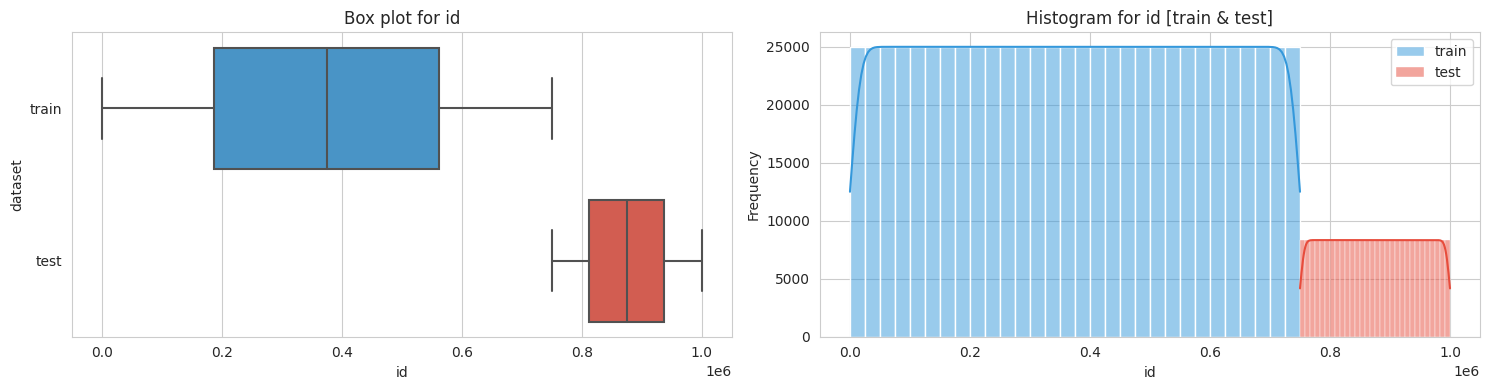

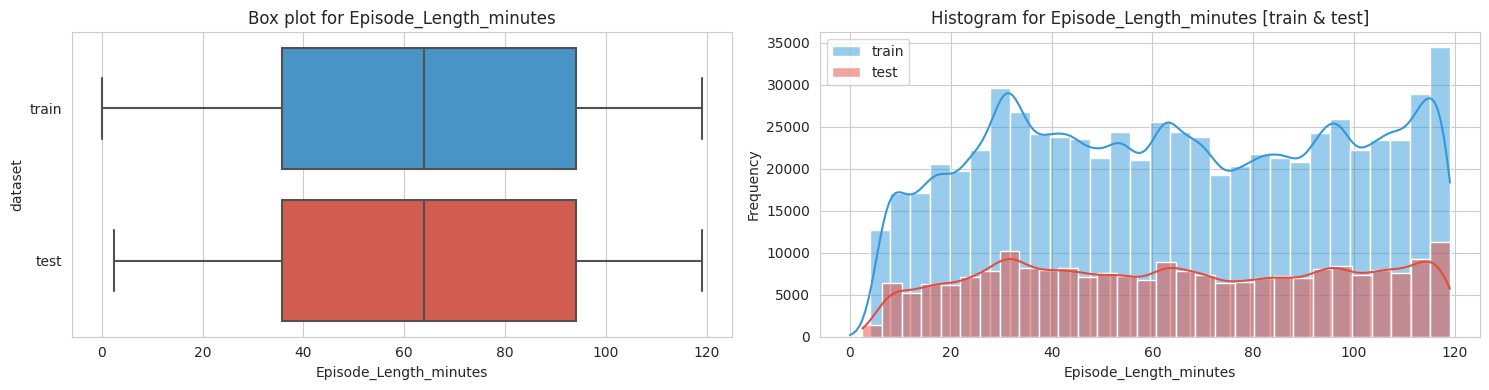

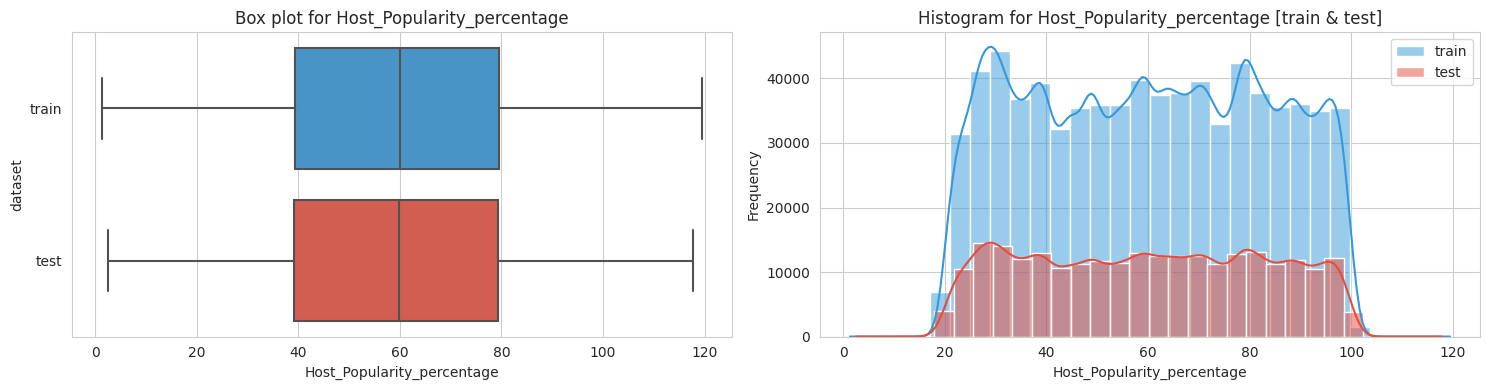

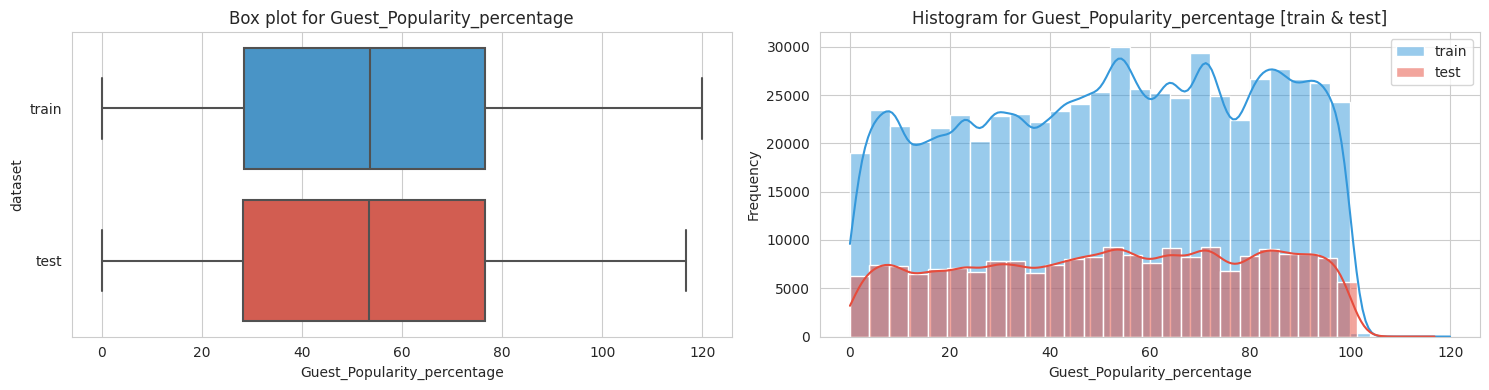

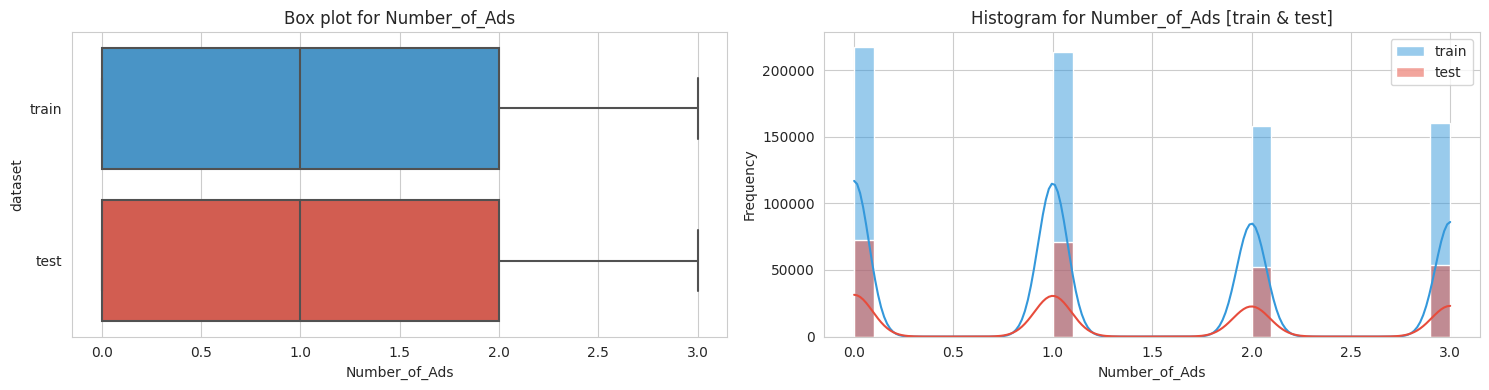

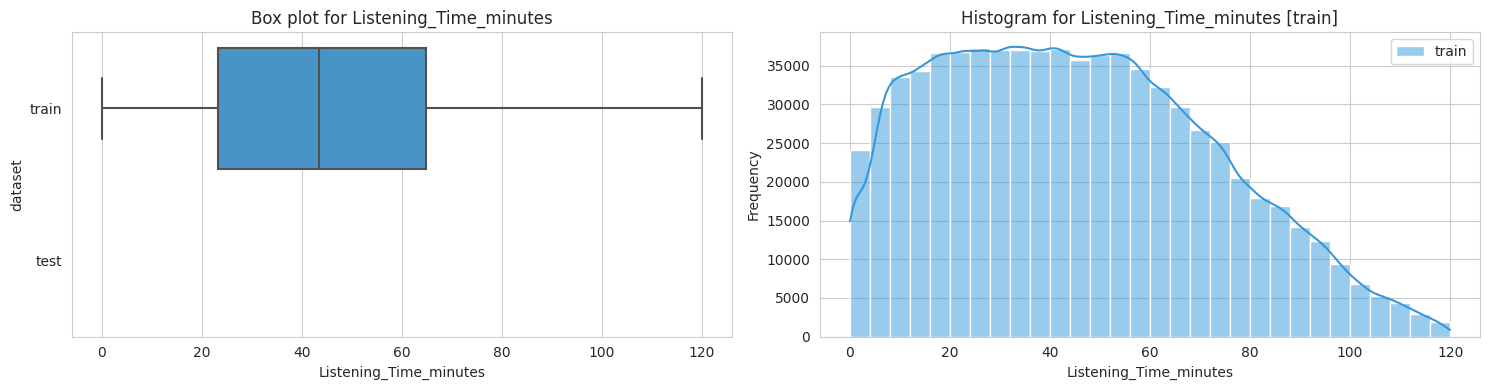

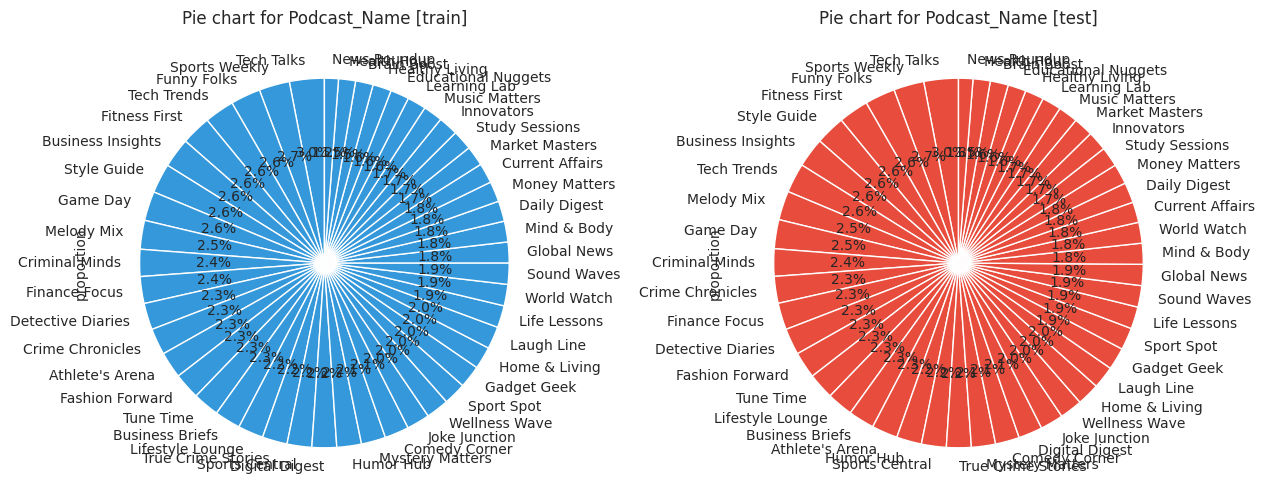

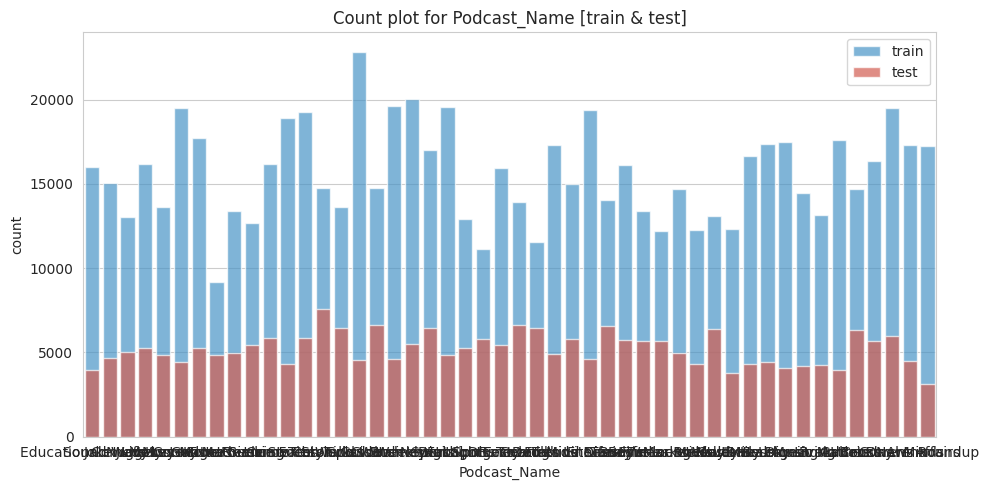

<Figure size 640x480 with 0 Axes>

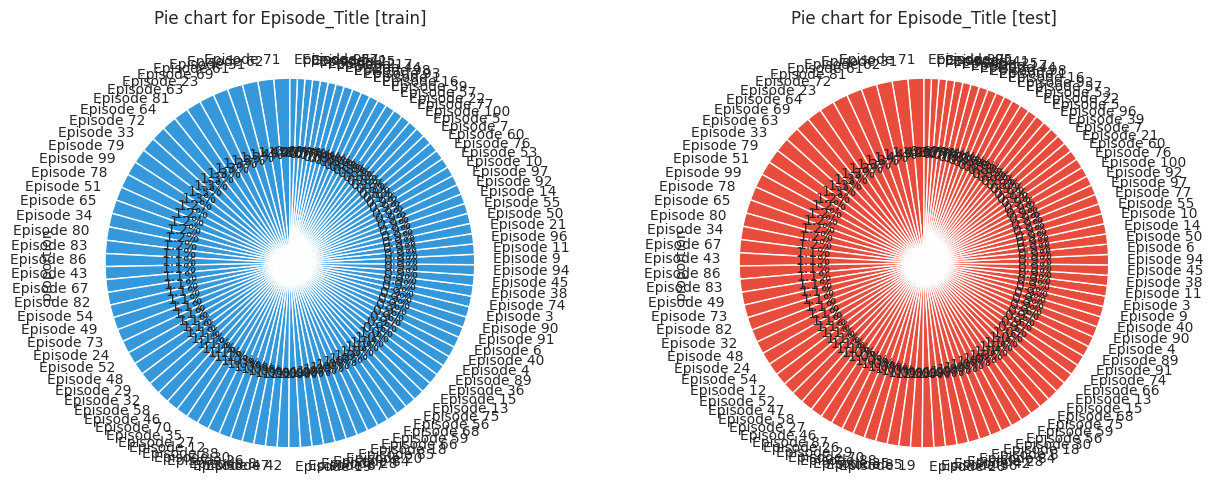

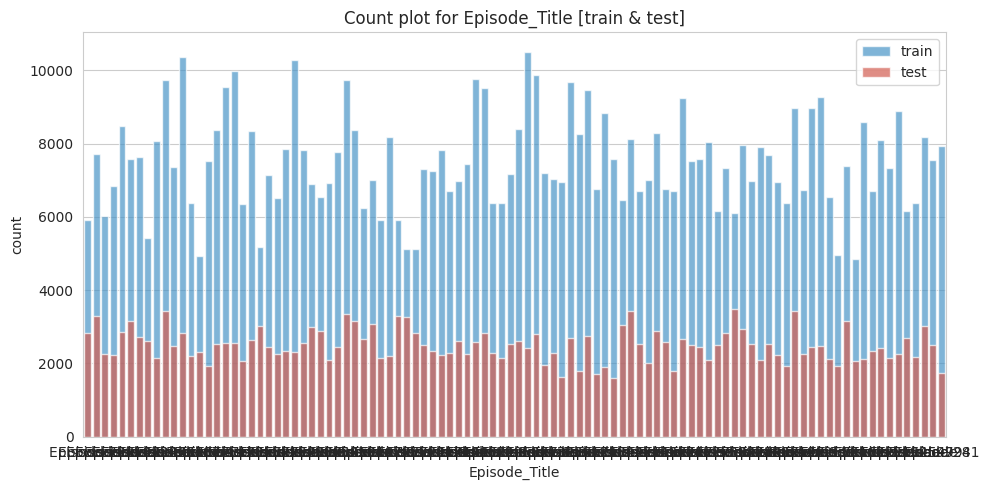

<Figure size 640x480 with 0 Axes>

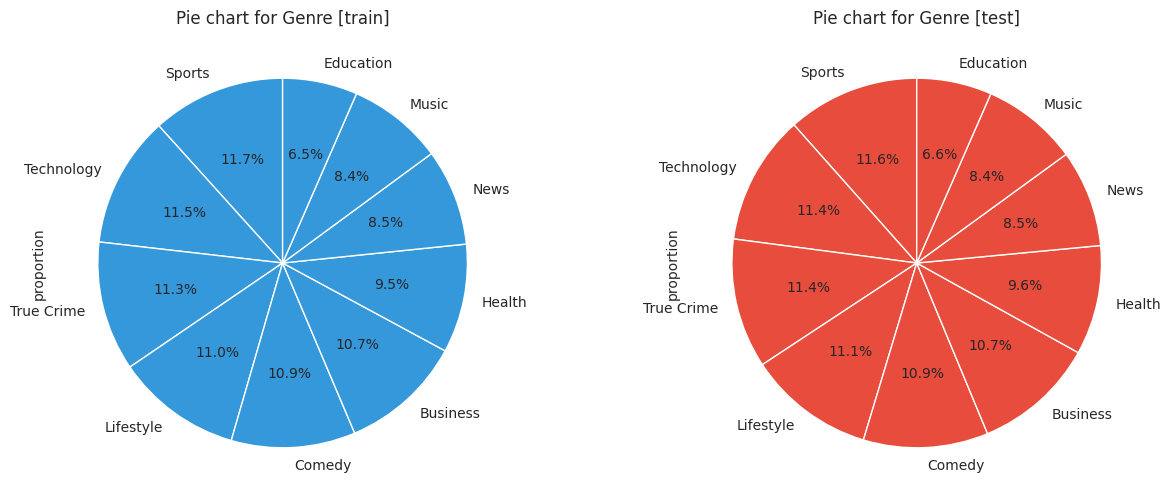

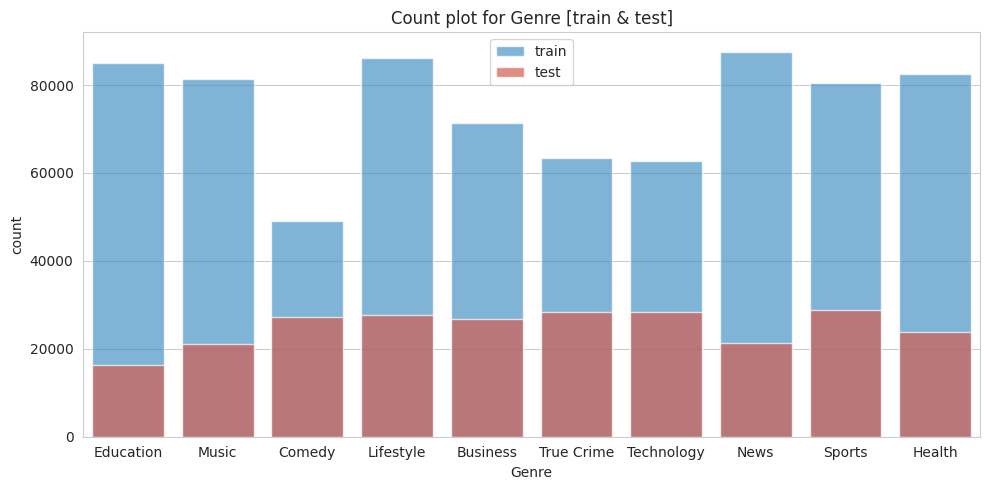

<Figure size 640x480 with 0 Axes>

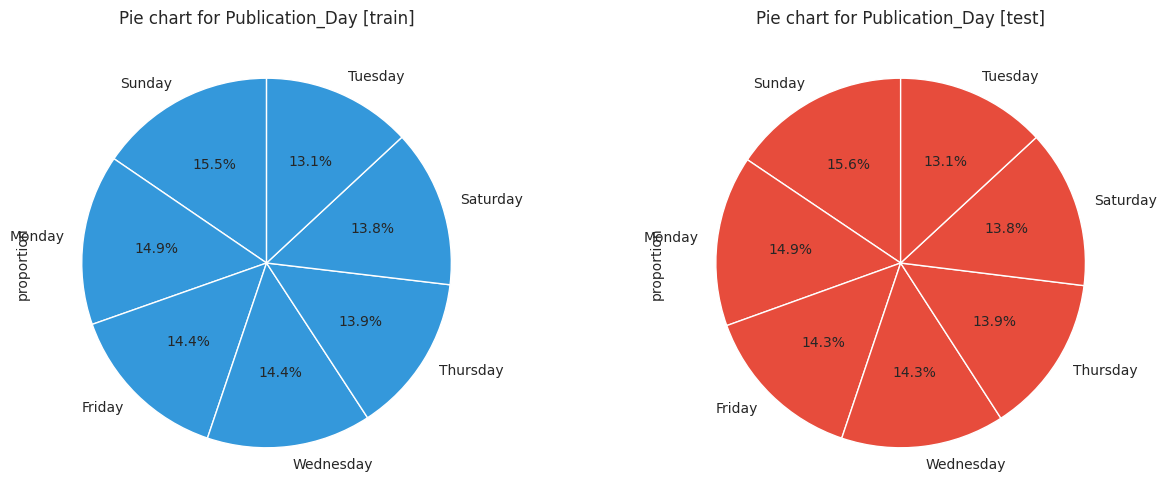

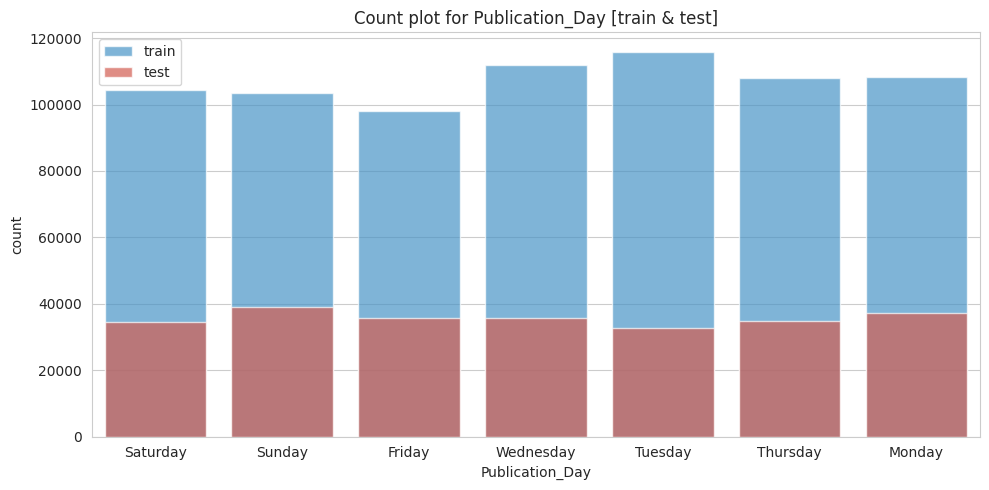

<Figure size 640x480 with 0 Axes>

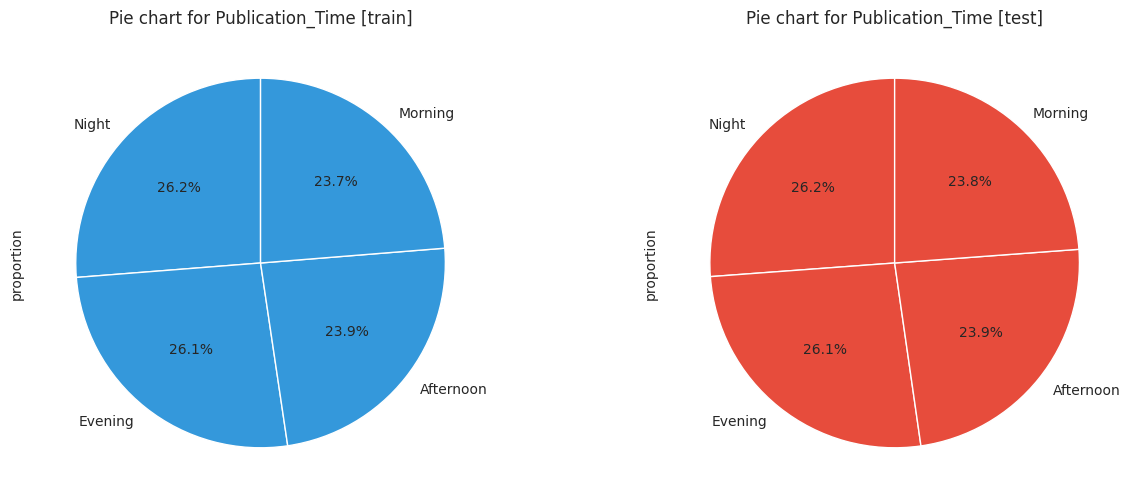

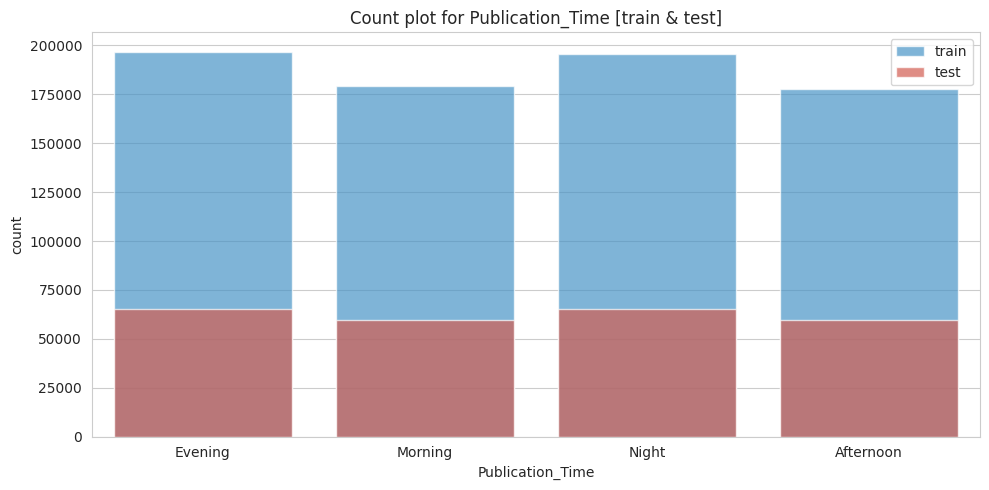

<Figure size 640x480 with 0 Axes>

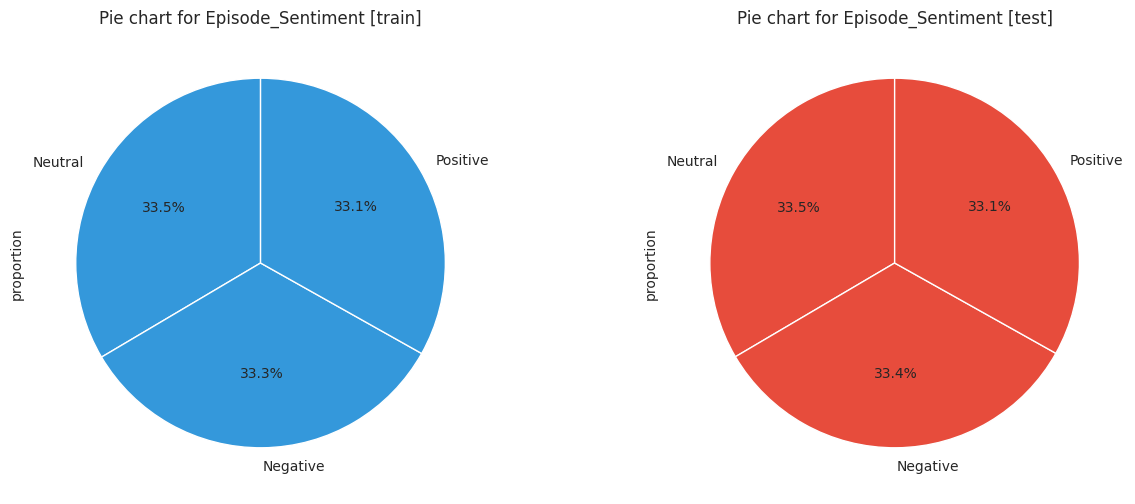

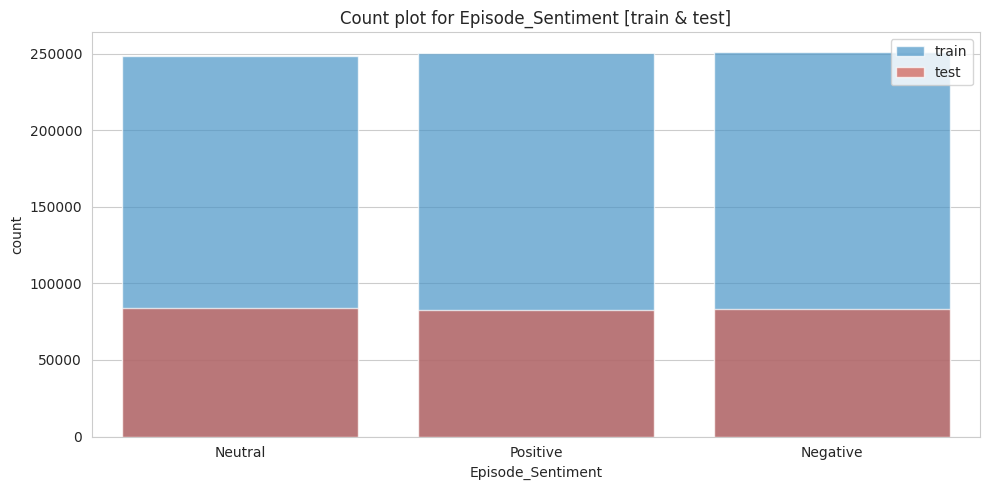

<Figure size 640x480 with 0 Axes>

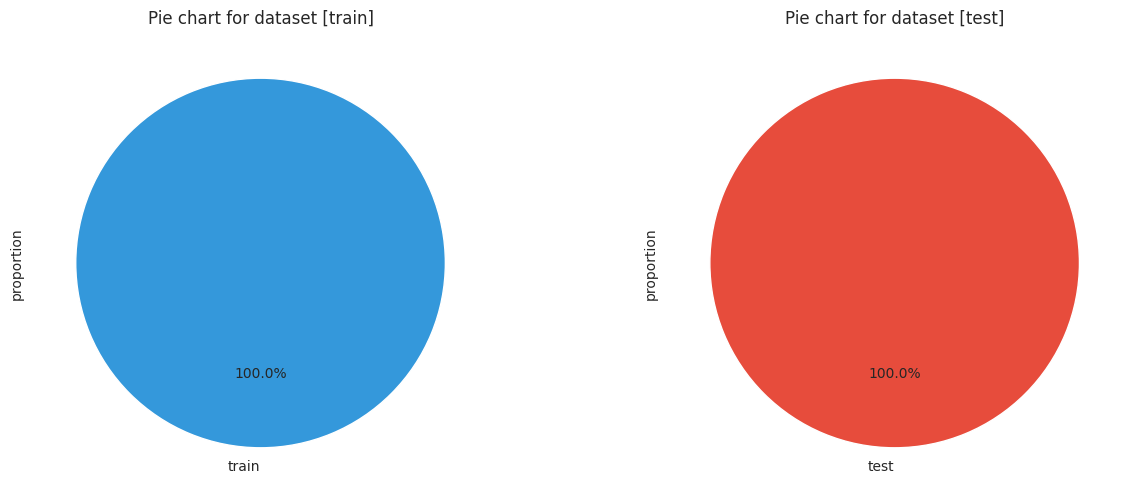

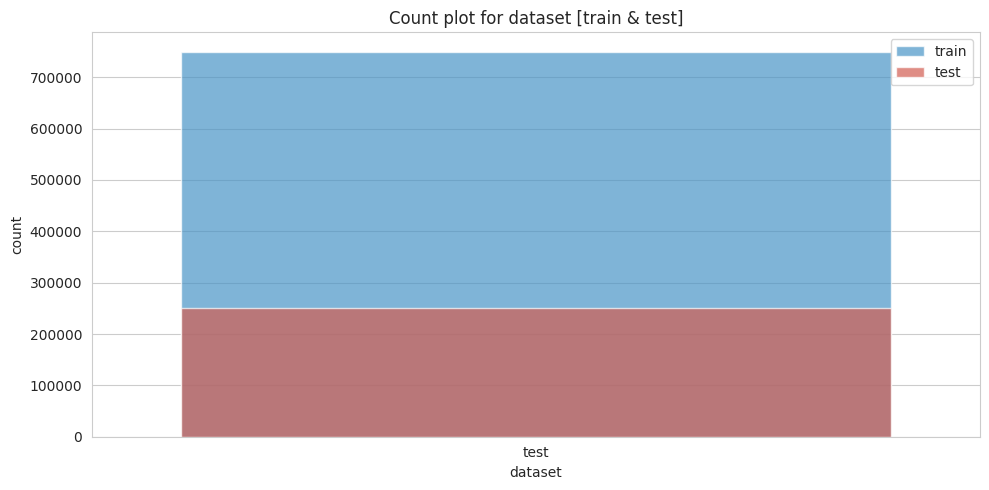

<Figure size 640x480 with 0 Axes>

In [14]:
# custom palette of colors
custom_palette = ['#3498db', '#e74c3c','#2ecc71']

# Add 'Dataset' column to distinguish between train and test data
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'

# Create a list of variables (both numerical and categorical data)
numerical_variables = df_train.select_dtypes(include=['number']).columns
categorical_variables = df_train.select_dtypes(include=['object']).columns

# A function to create plots for each variable
def create_variable_plots(variable, data_type='numerical'):

    sns.set_style('whitegrid')

    # For numeric data
    if data_type == 'numerical':
        fig, axes = plt.subplots(1, 2, figsize=(15, 4))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=pd.concat([df_train, df_test]), x=variable, y="dataset", palette=custom_palette)
        plt.xlabel(variable)
        plt.title(f"Box plot for {variable}")

        # histgram
        plt.subplot(1, 2, 2)
        sns.histplot(data=df_train, x=variable, color=custom_palette[0], kde=True, bins=30, label="train")
        if variable in df_test.columns:
            sns.histplot(data=df_test, x=variable, color=custom_palette[1], kde=True, bins=30, label="test")

        plt.xlabel(variable)
        plt.ylabel("Frequency")
        plt.title(f"Histogram for {variable} [train & test]" if variable in df_test.columns else f"Histogram for {variable} [train]")
        plt.legend()

    # For categorical data
    elif data_type == 'categorical':
        fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # figsizeを少し大きくしました

        # pie chart for train data
        plt.subplot(1, 2, 1)
        train_counts = df_train[variable].value_counts(normalize=True)
        train_counts.plot(kind='pie', autopct='%1.1f%%', colors=[custom_palette[0]] * len(train_counts), startangle=90, ax=plt.gca())
        plt.title(f"Pie chart for {variable} [train]")

        # pie chart for test data
        plt.subplot(1, 2, 2)
        if variable in df_test.columns:
            test_counts = df_test[variable].value_counts(normalize=True)
            test_counts.plot(kind='pie', autopct='%1.1f%%', colors=[custom_palette[1]] * len(test_counts), startangle=90, ax=plt.gca())
            plt.title(f"Pie chart for {variable} [test]")
        else:
            plt.gca().axis('off') # Empty plot if no columns in test data

        # countplot
        fig_countplot, ax_countplot = plt.subplots(figsize=(10, 5))
        sns.countplot(data=df_train, x=variable, color=custom_palette[0], alpha=0.7, label="train", ax=ax_countplot)
        if variable in df_test.columns:
            sns.countplot(data=df_test, x=variable, color=custom_palette[1], alpha=0.7, label="test", ax=ax_countplot)
        ax_countplot.set_title(f"Count plot for {variable} [train & test]")
        ax_countplot.legend()
        plt.tight_layout()
        plt.show()

    plt.tight_layout()
    plt.show()

# Create plots for numerical data
for variable in numerical_variables:
    create_variable_plots(variable, data_type='numerical')

# Create plots for categorical data
for variable in categorical_variables:
    create_variable_plots(variable, data_type='categorical')

# # remove unnecessary columns
del df_train['dataset']
del df_test['dataset']

# Vivariate

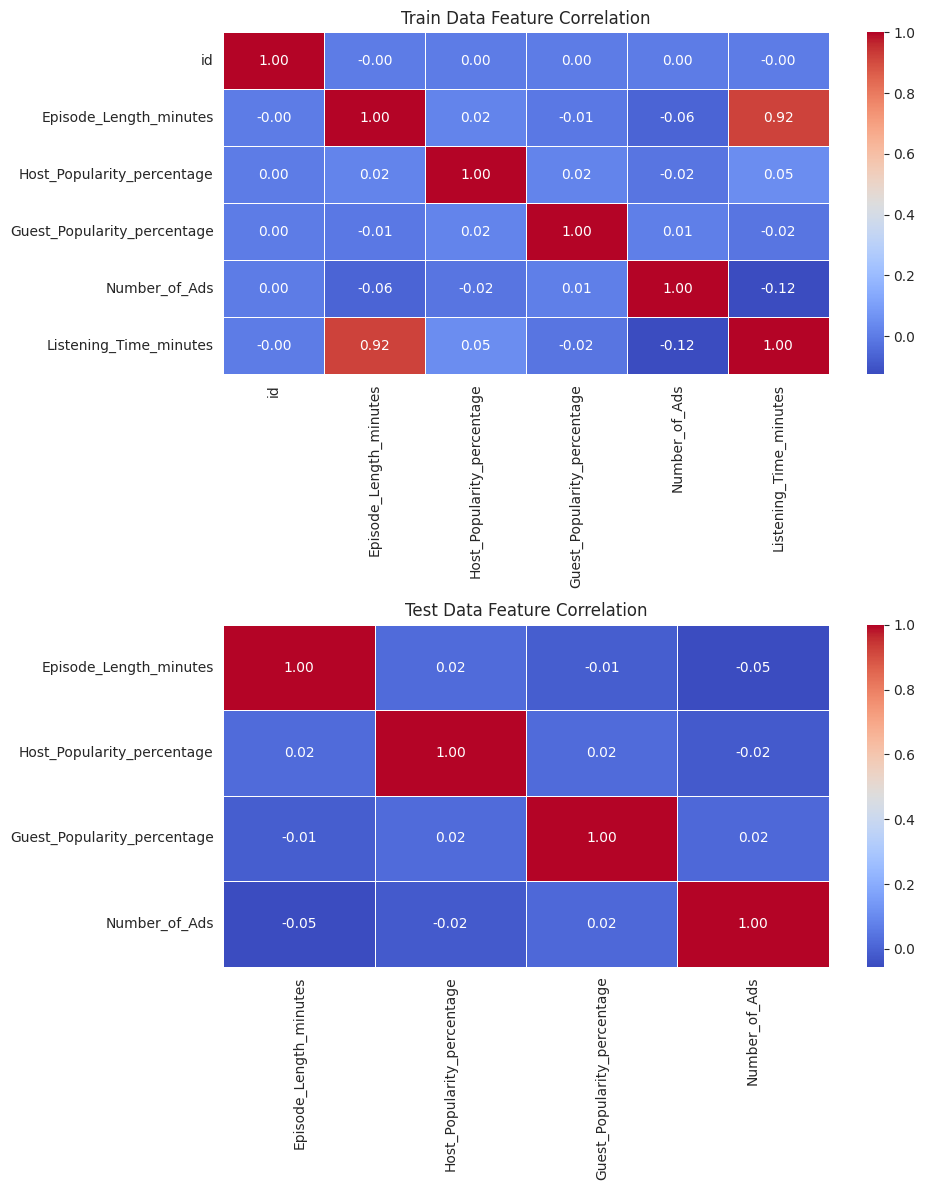

In [15]:
# Create a subplot (1 column, 2 rows)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

numerical_variables_tmp = ['Episode_Length_minutes', 'Host_Popularity_percentage','Guest_Popularity_percentage', 'Number_of_Ads']

# Correlation matrix of df_train
# (if necessary, extract only highly correlated variables.ex：mask=(corr < 0.8)))
sns.heatmap(df_train[numerical_variables].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Train Data Feature Correlation')

# # Correlation matrix of df_test
# (if necessary, extract only highly correlated variables.ex：mask=(corr < 0.8)))
sns.heatmap(df_test[numerical_variables_tmp].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Test Data Feature Correlation')

# Layout adjustment
plt.tight_layout()
plt.show()

Pairplot of Train Data


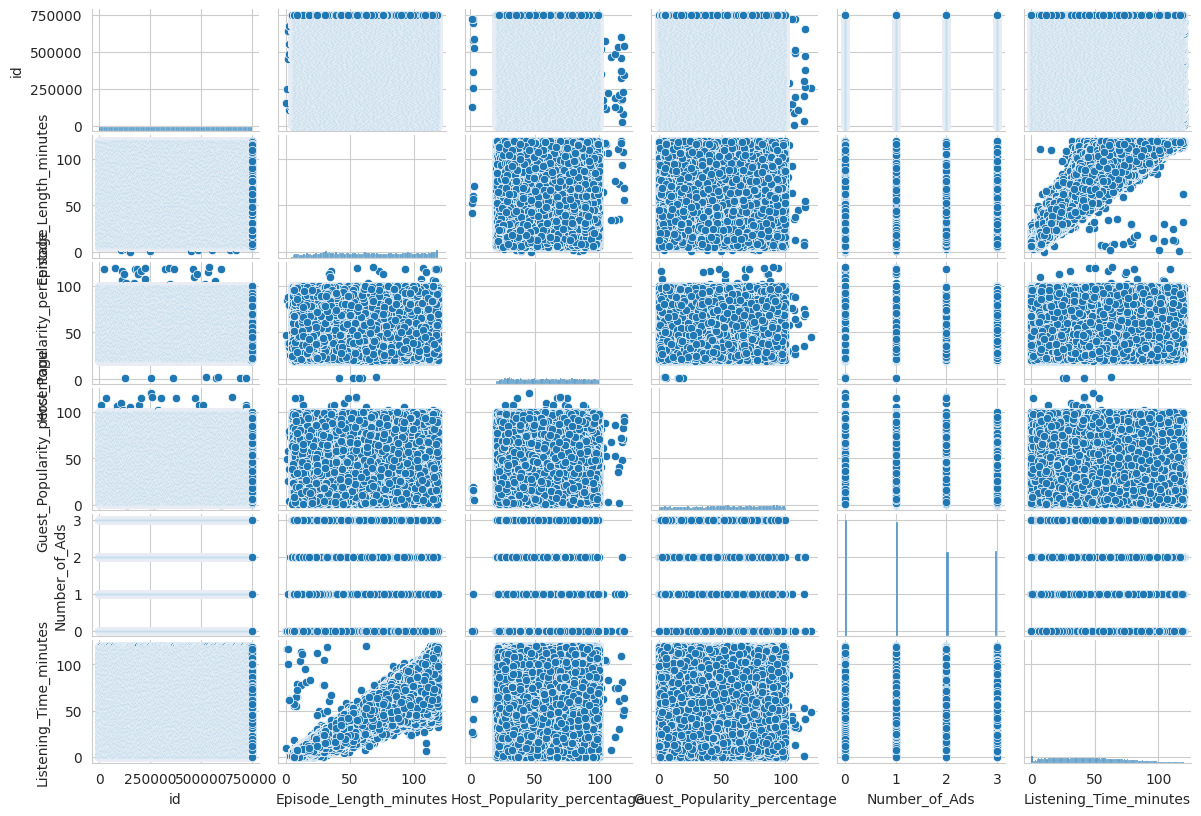

------------------------------------------------------------------------------------------------------
Pairplot of Test Data


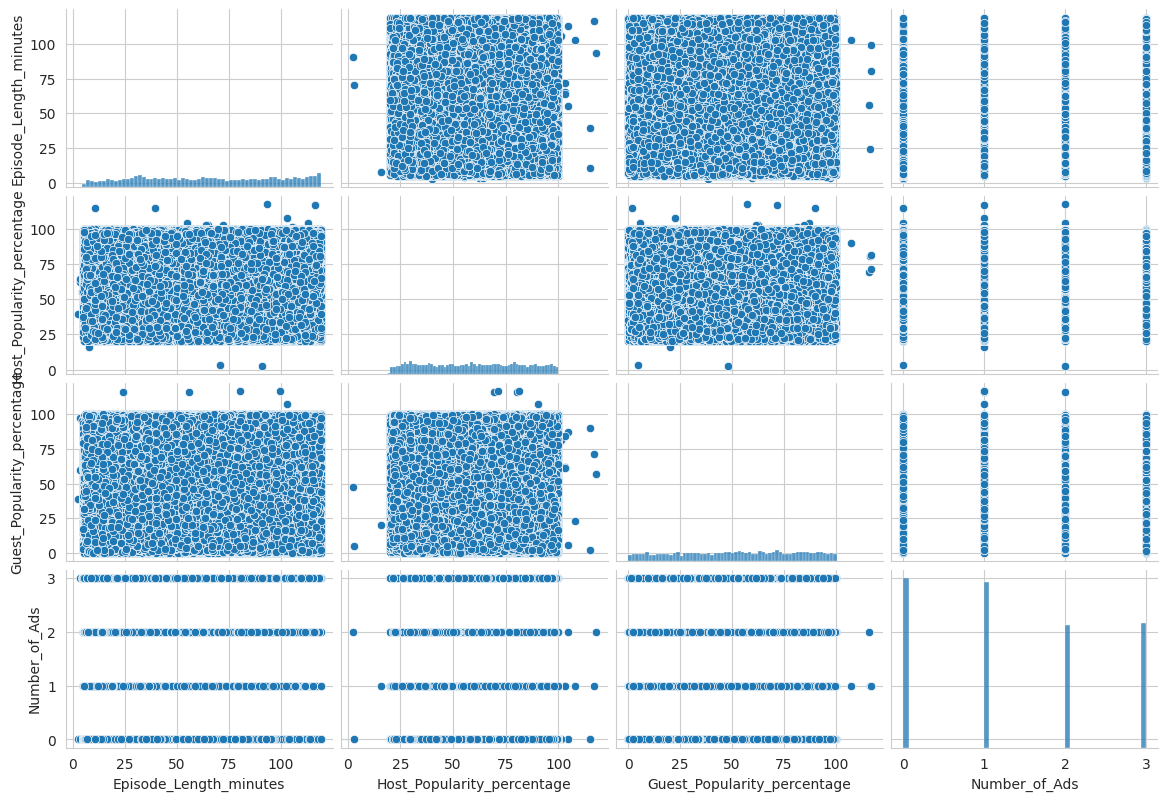

In [16]:
# making pairplot
print('Pairplot of Train Data')
grid_train = sns.pairplot(df_train[numerical_variables])
grid_train.fig.set_size_inches(12, 8)
plt.show()

print('------------------------------------------------------------------------------------------------------')

print('Pairplot of Test Data')
grid_test = sns.pairplot(df_test[numerical_variables_tmp])
grid_test.fig.set_size_inches(12, 8)
plt.show()

# Relationship Between target variable and other variables

In [17]:
RMV = df_train.select_dtypes(include=['number']).columns.tolist()
FEATURES = [c for c in list( df_train.columns ) if not c in RMV]
print(f"We have {len(FEATURES)} basic features:")
print( FEATURES )

We have 6 basic features:
['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


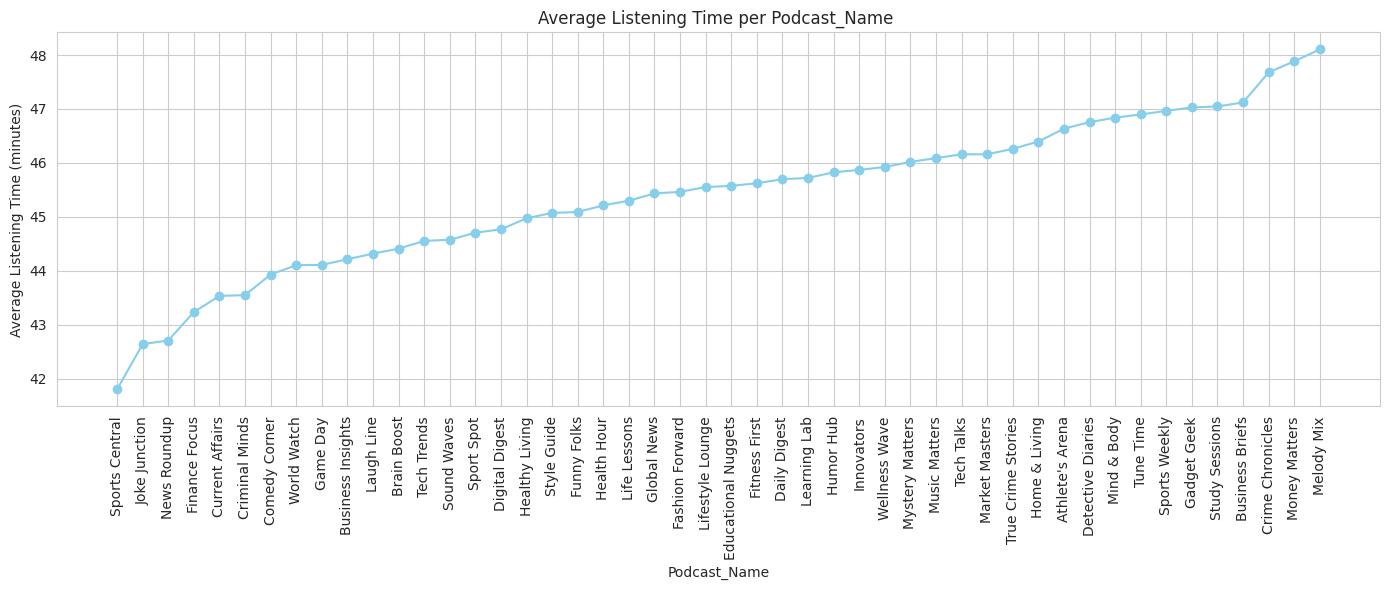

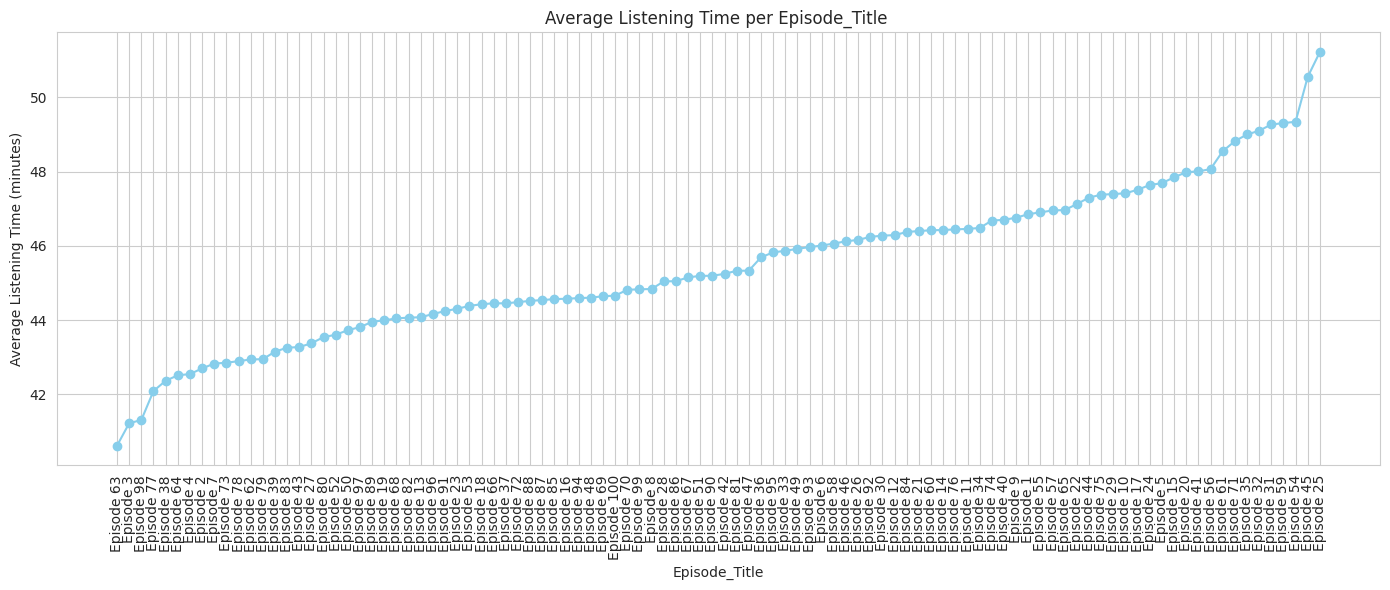

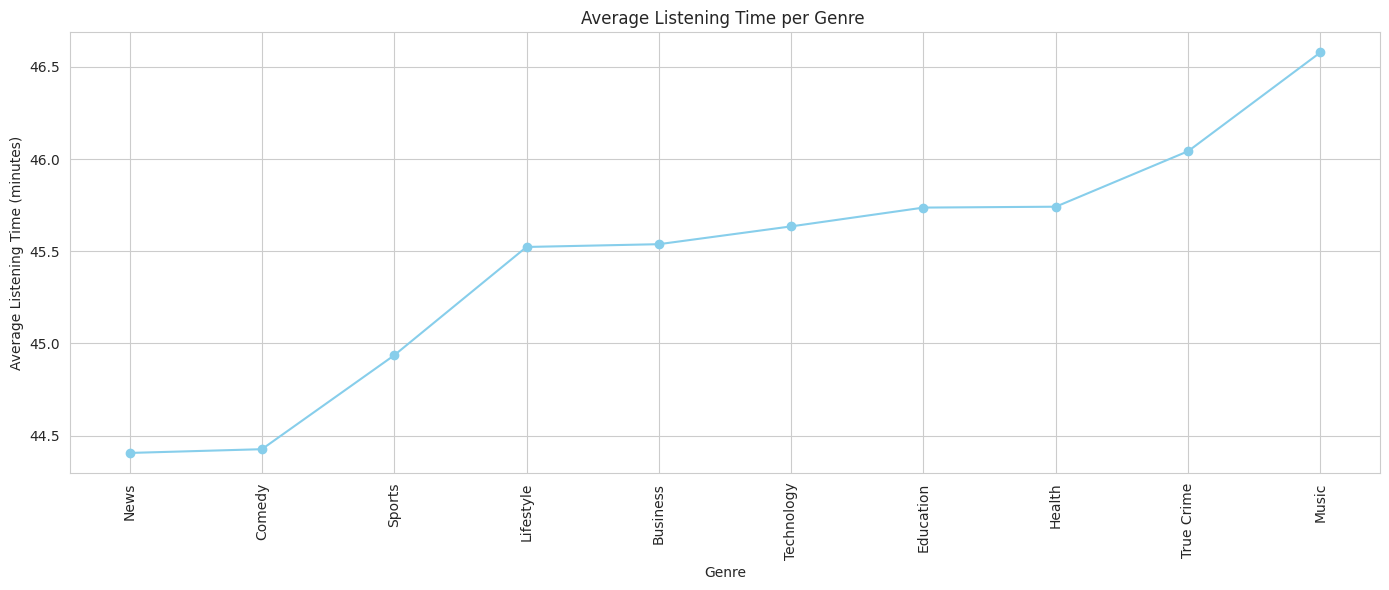

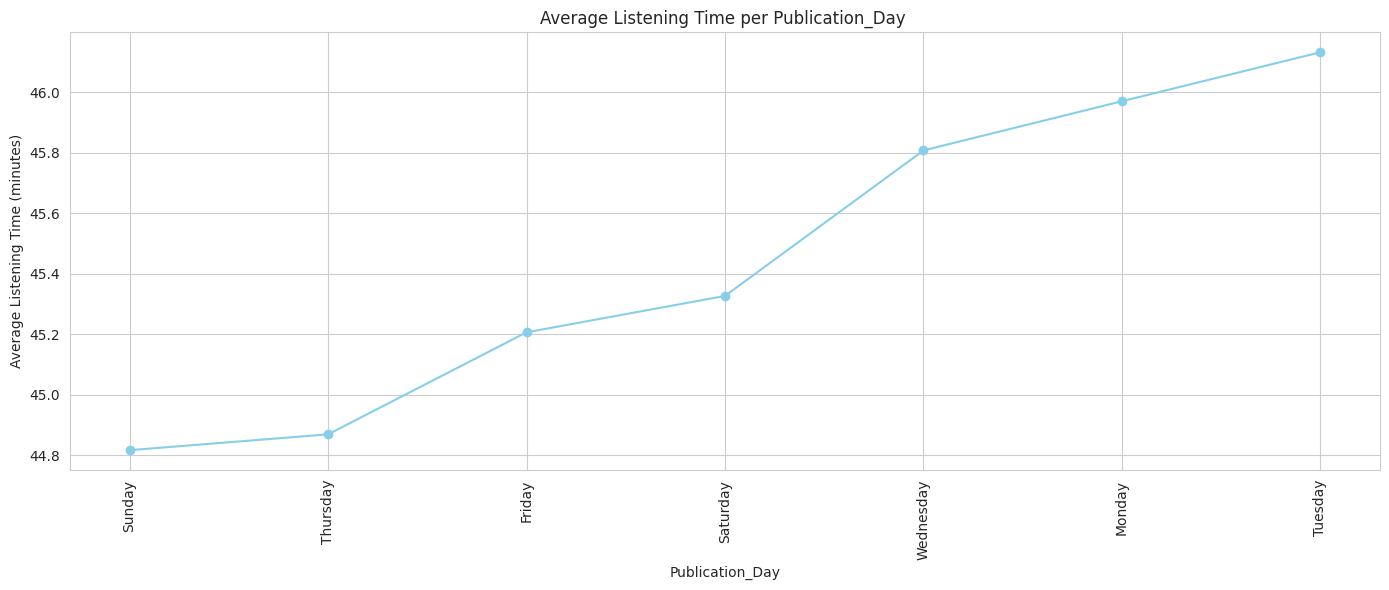

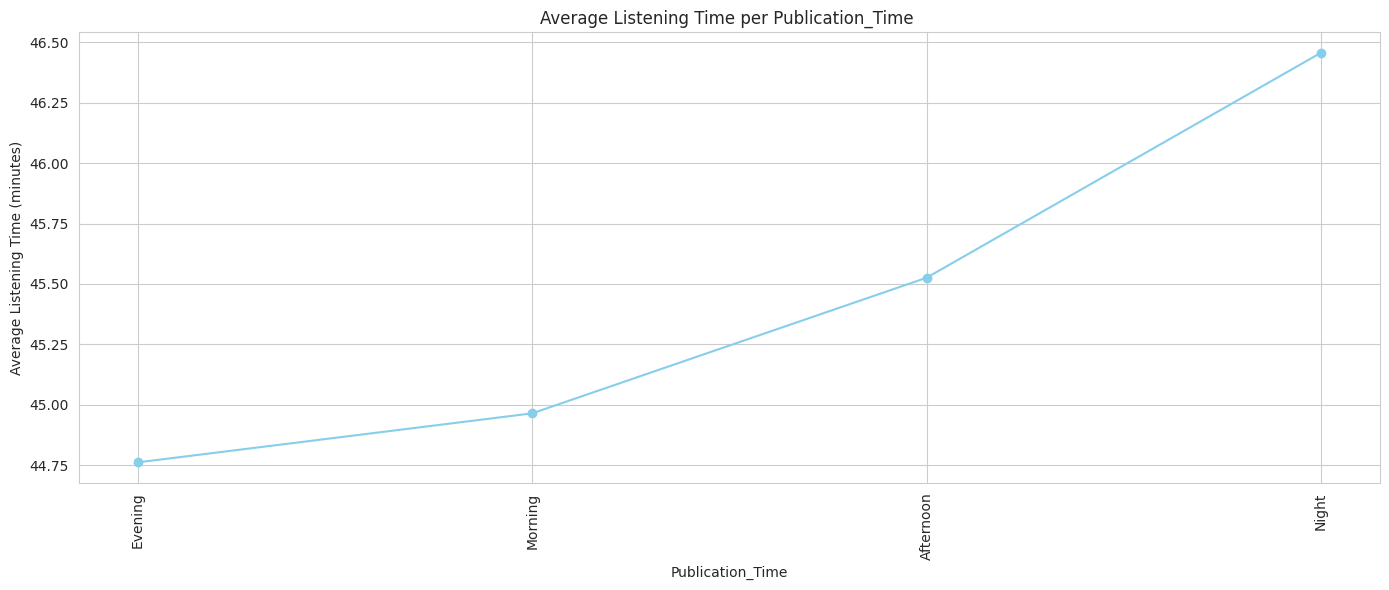

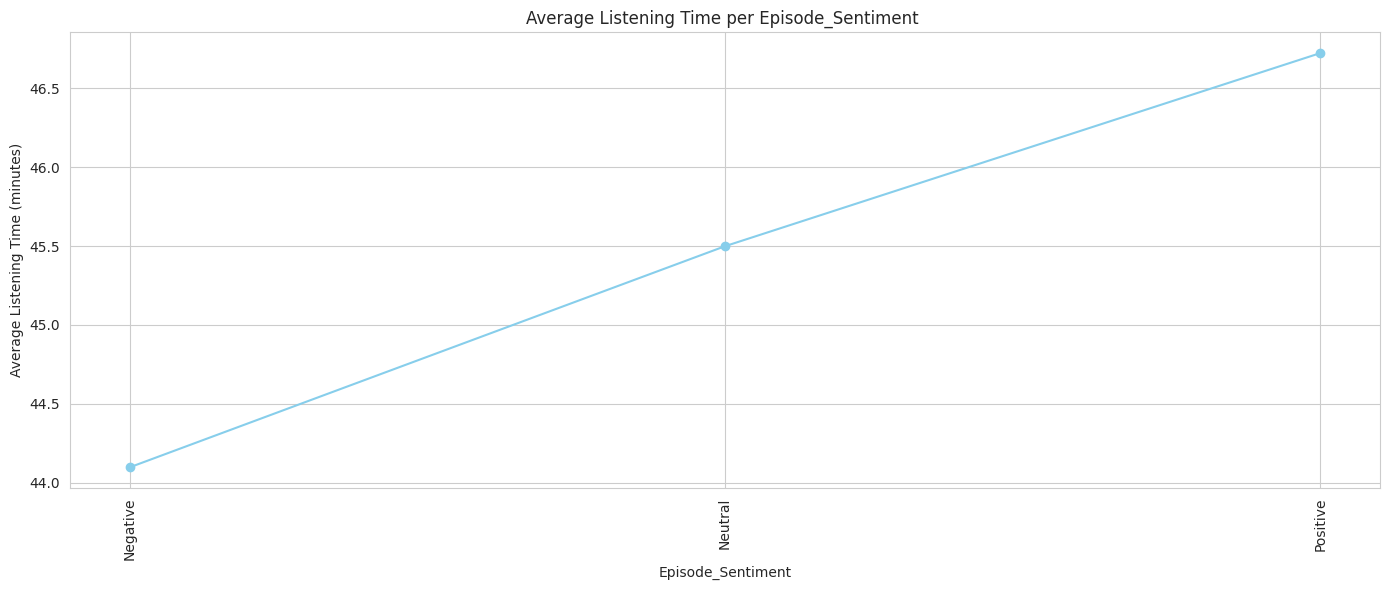

In [18]:
for feature in FEATURES:
    plt.figure(figsize=(14, 6))
    avg_listening = df_train.groupby(feature)['Listening_Time_minutes'].mean().sort_values()
    plt.plot(avg_listening.index, avg_listening.values, marker='o', linestyle='-', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Average Listening Time (minutes)')
    plt.title(f'Average Listening Time per {feature} ')
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Crosstab

In [19]:
def extract_episode_number(df, episode_title_col='Episode_Title',
                           output_episode_number_col='Episode_Number',
                           temp_episode_number_str_col='Episode_Number_str'):
  """
  A function that extracts the episode number from the episode title in the DataFrame, converts it to a numeric type, 
  adds it to a new column, and deletes the temporary string column.

  Args:
    df (pd.DataFrame): The DataFrame to process.
    Episode_Title_col (str): Episode title column name (default: 'Episode_Title').
    output_episode_number_col (str): Output episode number column name (default: 'Episode_Number').
    temp_episode_number_str_col (str): Temporary string episode number column name (default: 'Episode_Number_str').
  """
  # Split the episode title on the space and extract the second element
  df[temp_episode_number_str_col] = df[episode_title_col].str.split(' ').str[1]

  # Convert extracted string to number (with error handling)
  df[output_episode_number_col] = pd.to_numeric(df[temp_episode_number_str_col], errors='coerce')

  # Delete the temporary string column
  del df[temp_episode_number_str_col]

In [20]:
extract_episode_number(df_train)
extract_episode_number(df_test)

## Podcast_Name

In [21]:
def display_crosstab_with_row_percentages(df, target_col, comparision_col):
    """
    Creates and displays a cross-tabulation table and its row percentages
    with background gradient styling.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The column to use as the index (rows) of the cross-tabulation.
        comparision_col (str): The column to use for the values (columns) of the cross-tabulation.
    """
    # Create a cross-tabulation table
    cross_table = pd.crosstab(df[target_col], df[comparision_col])

    # Apply gradient background color to the counts
    styled_columns = cross_table.columns
    styled_cross_table = cross_table.style.background_gradient(cmap='viridis', subset=pd.IndexSlice[:, styled_columns])
    print(f"Cross-tabulation of {target_col} vs {comparision_col}:")
    display(styled_cross_table)

    # Calculate the percentage across the row
    row_totals = cross_table.sum(axis=1)
    row_percentages = cross_table.div(row_totals, axis=0)

    # Percentage crosstabs with styles applied
    styled_row_percentages = row_percentages.style.background_gradient(cmap='viridis')
    print(f"\nRow Percentages of {target_col} vs {comparision_col}:")
    display(styled_row_percentages)

In [22]:
def display_combined_crosstab_with_row_percentages(df, target_col, comparision_col):
    """
    Creates and displays a cross-tabulation table combined with its row percentages
    with background gradient styling.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_col (str): The column to use as the index (rows) of the cross-tabulation.
        comparision_col (str): The column to use for the values (columns) of the cross-tabulation.
    """
    # Create a cross-tabulation table
    cross_table = pd.crosstab(df[target_col], df[comparision_col], dropna=False)

    # Calculate the percentage across the row
    row_totals = cross_table.sum(axis=1)
    row_percentages = cross_table.div(row_totals, axis=0)

    # Create percentage column names
    percentage_cols = [f'{col} (%)' for col in row_percentages.columns]
    row_percentages.columns = percentage_cols

    # Combine the count and percentage tables
    combined_table = pd.concat([cross_table, row_percentages], axis=1)

    # Apply gradient background color to the combined table
    styled_combined_table = combined_table.style.background_gradient(cmap='viridis')
    print(f"Combined Cross-tabulation of {target_col} vs {comparision_col} (Counts and Row Percentages):")
    display(styled_combined_table)

In [23]:
 display_crosstab_with_row_percentages(df_train, 'Podcast_Name', 'Episode_Number')

Cross-tabulation of Podcast_Name vs Episode_Number:



Row Percentages of Podcast_Name vs Episode_Number:


In [24]:
display_combined_crosstab_with_row_percentages(df_train, 'Podcast_Name', 'Genre')

Combined Cross-tabulation of Podcast_Name vs Genre (Counts and Row Percentages):


In [25]:
display_combined_crosstab_with_row_percentages(df_train, 'Podcast_Name', 'Episode_Sentiment')

Combined Cross-tabulation of Podcast_Name vs Episode_Sentiment (Counts and Row Percentages):


## Genre

In [26]:
display_combined_crosstab_with_row_percentages(df_train, 'Genre', 'Publication_Day')

Combined Cross-tabulation of Genre vs Publication_Day (Counts and Row Percentages):


In [27]:
display_combined_crosstab_with_row_percentages(df_train, 'Genre', 'Publication_Time')

Combined Cross-tabulation of Genre vs Publication_Time (Counts and Row Percentages):


In [28]:
display_combined_crosstab_with_row_percentages(df_train, 'Genre', 'Episode_Sentiment')

Combined Cross-tabulation of Genre vs Episode_Sentiment (Counts and Row Percentages):


In [29]:
display_combined_crosstab_with_row_percentages(df_train, 'Publication_Time', 'Episode_Sentiment')

Combined Cross-tabulation of Publication_Time vs Episode_Sentiment (Counts and Row Percentages):


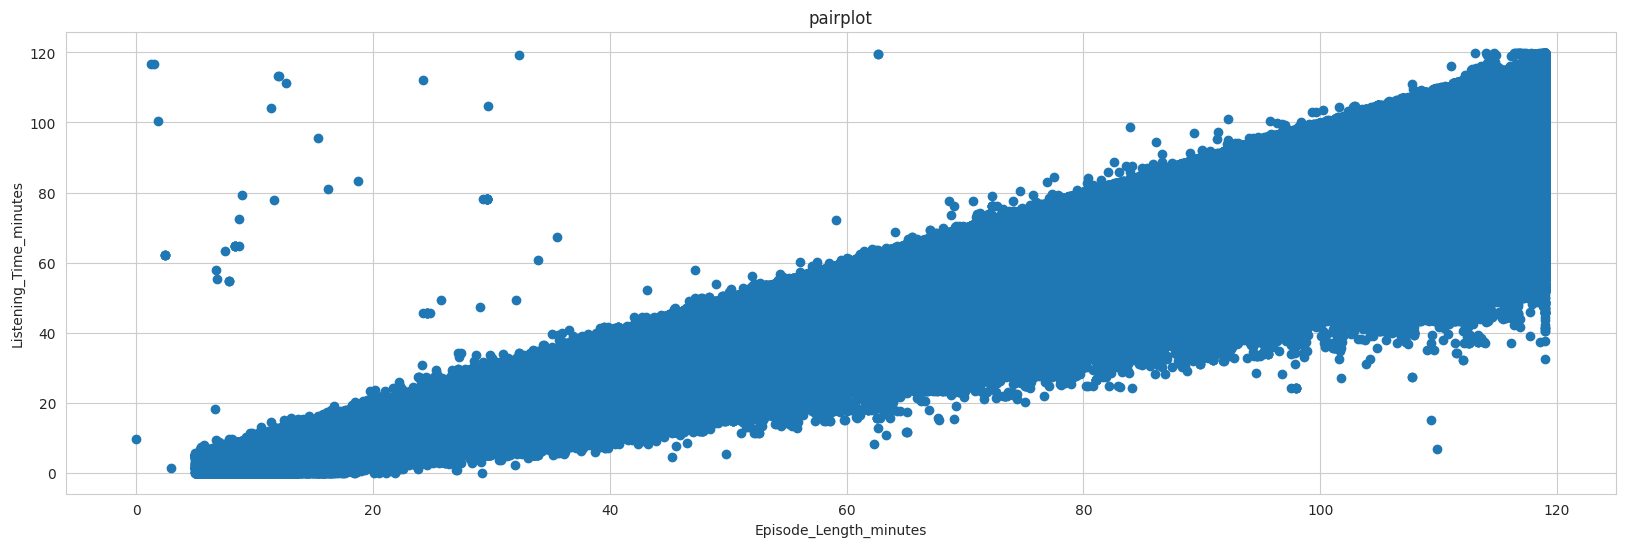

In [30]:
plt.figure(figsize=(20, 6))
plt.scatter(df_train['Episode_Length_minutes'], df_train['Listening_Time_minutes'])
plt.xlabel('Episode_Length_minutes')
plt.ylabel('Listening_Time_minutes')
plt.title('pairplot')
plt.grid(True)
plt.show()

# Missing Value

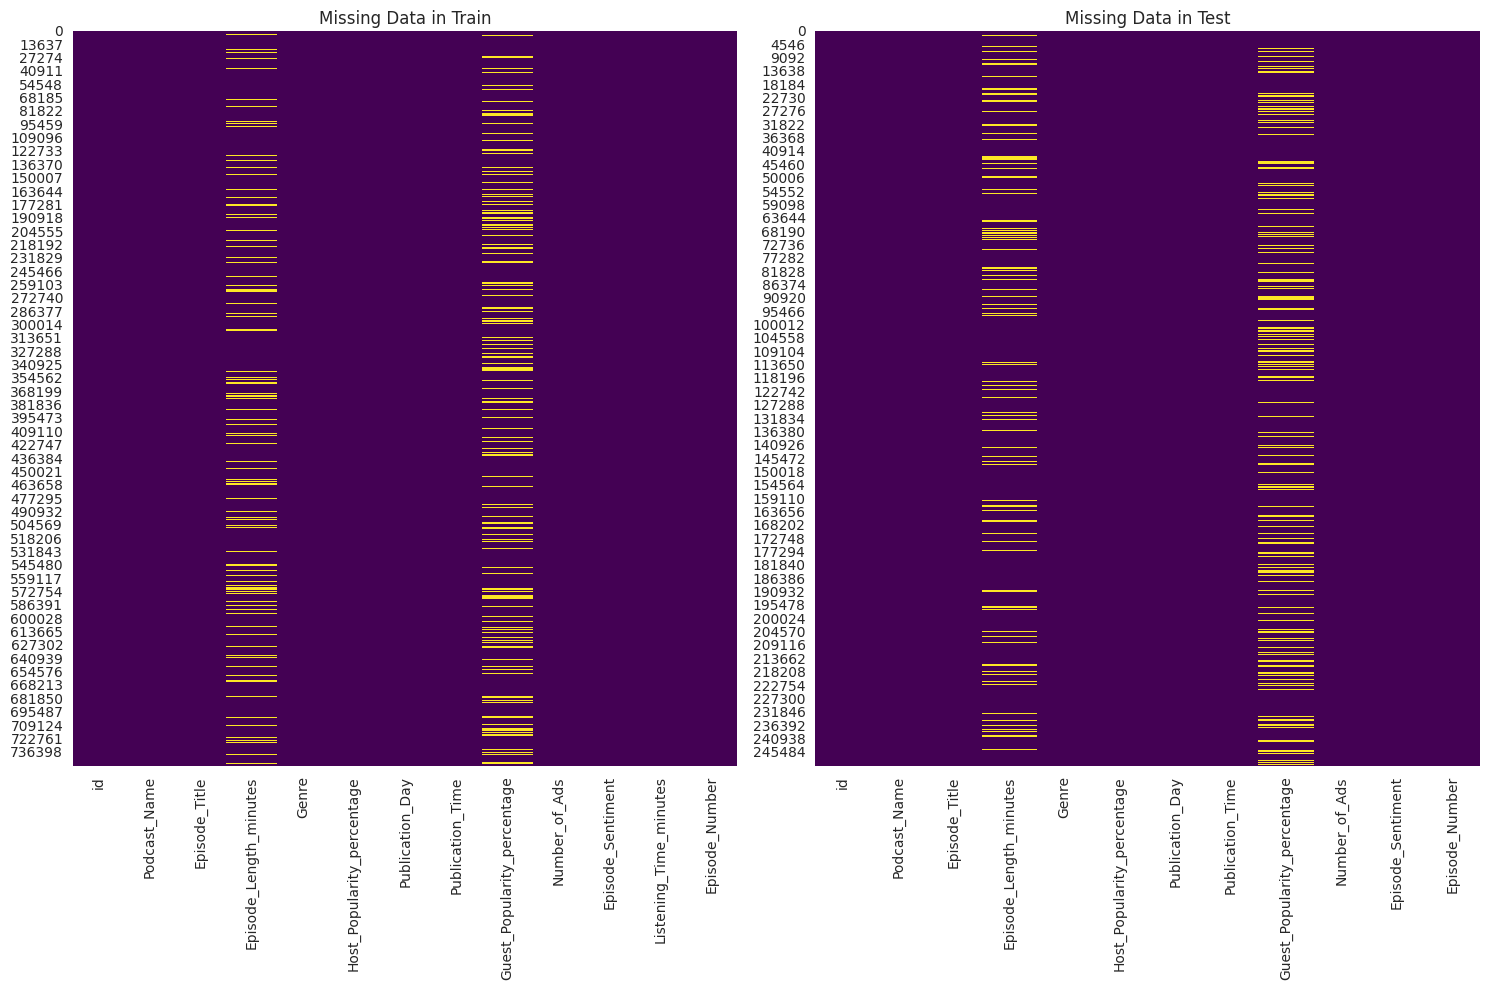

In [31]:
# Create a 1-by-2 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Missing value heatmap of training data
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Data in Train')

# Missing value heatmap for test data
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis', ax=axes[1])
axes[1].set_title('Missing Data in Test')

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# def analyze_episode_data_flexible_columns(df, episode_num_col='Episode_Number',
#                                           podcast_name_col='Podcast_Name',
#                                           episode_sentiment_col='Episode_Sentiment',
#                                           episode_length_col='Episode_Length_minutes'):
#   """
#   A function that returns the number of unique combinations related to Episodes in a DataFrame, groups by a specified column,
#   and aggregates and displays the column for a specified length.

#   Args:
#     df (pd.DataFrame): The DataFrame to analyze.
#     episode_num_col (str): Episode number column name (default: 'Episode_Number').
#     podcast_name_col (str): Podcast name column name (default: 'Podcast_Name').
#     episode_sentiment_col (str): Episode sentiment column name (default: 'Episode_Sentiment').
#     episode_length_col (str): Episode length column name (default: 'Episode_Length_minutes').
#   """

#   # Calculate and display the number of unique combinations
#   unique_combinations = (df[episode_num_col].nunique() * df[podcast_name_col].nunique() * df[episode_sentiment_col].nunique())
#   print(f"unique ({episode_num_col}, {podcast_name_col}, {episode_sentiment_col}) combination: {unique_combinations}")

#   # Group by a specified column and display a count of columns of a specified length.
#   tmp_count = df.groupby([podcast_name_col, episode_num_col, episode_sentiment_col],as_index=False, dropna=False)[episode_length_col].count()
#   tmp_count = tmp_count.rename(columns={episode_length_col: f'{episode_length_col}_count'})
#   print(f"\n cnt:{episode_length_col}")
#   display(tmp_count.sort_values(f'{episode_length_col}_count', ascending=True))

#   # Group by a specified column and calculate and display the average of the column for a specified length.
#   tmp_mean = df.groupby([podcast_name_col, episode_num_col, episode_sentiment_col],as_index=False, dropna=False)[episode_length_col].mean()
#   tmp_mean = tmp_mean.rename(columns={episode_length_col: f'{episode_length_col}_mean'}) # Change the column name of the average result
#   print(f"\n avg:{episode_length_col} ")
#   display(tmp_mean)

In [33]:
def analyze_episode_data_flexible_columns(df, episode_num_col='Episode_Number',
                                          podcast_name_col='Podcast_Name',
                                          episode_length_col='Episode_Length_minutes'):
  """
  A function that returns the number of unique combinations related to Episodes in a DataFrame, groups by a specified column,
  and aggregates and displays the column for a specified length.

  Args:
    df (pd.DataFrame): The DataFrame to analyze.
    episode_num_col (str): Episode number column name (default: 'Episode_Number').
    podcast_name_col (str): Podcast name column name (default: 'Podcast_Name').
    episode_length_col (str): Episode length column name (default: 'Episode_Length_minutes').
  """

  # Calculate and display the number of unique combinations
  unique_combinations = (df[episode_num_col].nunique() * df[podcast_name_col].nunique())
  print(f"unique ({episode_num_col}, {podcast_name_col}) combination: {unique_combinations}")

  # Group by a specified column and display a count of columns of a specified length.
  tmp_count = df.groupby([podcast_name_col, episode_num_col],as_index=False, dropna=False)[episode_length_col].count()
  tmp_count = tmp_count.rename(columns={episode_length_col: f'{episode_length_col}_count'})
  print(f"\n cnt:{episode_length_col}")
  display(tmp_count.sort_values(f'{episode_length_col}_count', ascending=True))

  # Group by a specified column and calculate and display the average of the column for a specified length.
  tmp_mean = df.groupby([podcast_name_col, episode_num_col],as_index=False, dropna=False)[episode_length_col].mean()
  tmp_mean = tmp_mean.rename(columns={episode_length_col: f'{episode_length_col}_mean'}) # Change the column name of the average result
  print(f"\n avg:{episode_length_col} ")
  display(tmp_mean)

In [34]:
analyze_episode_data_flexible_columns(df_train,
                                        episode_num_col='Episode_Number',
                                        podcast_name_col='Podcast_Name',
                                        episode_length_col='Episode_Length_minutes')

unique (Episode_Number, Podcast_Name) combination: 4800

 cnt:Episode_Length_minutes


Podcast_Name  Episode_Number  Episode_Length_minutes_count
1194  Educational Nuggets              95                            38
4001       Study Sessions               2                            40
173           Brain Boost              74                            42
3540         News Roundup              41                            43
3524         News Roundup              25                            45
...                   ...             ...                           ...
4270           Tech Talks              71                           311
4271           Tech Talks              72                           316
1722             Game Day              23                           318
1522          Funny Folks              23                           327
4268           Tech Talks              69                           338

[4800 rows x 3 columns]


 avg:Episode_Length_minutes 


Podcast_Name  Episode_Number  Episode_Length_minutes_mean
0     Athlete's Arena               1                    64.991239
1     Athlete's Arena               2                    59.941077
2     Athlete's Arena               3                    61.662393
3     Athlete's Arena               4                    60.515157
4     Athlete's Arena               5                    70.539867
...               ...             ...                          ...
4795      World Watch              96                    62.158387
4796      World Watch              97                    59.577109
4797      World Watch              98                    54.207935
4798      World Watch              99                    63.864945
4799      World Watch             100                    59.342188

[4800 rows x 3 columns]

In [35]:
analyze_episode_data_flexible_columns(df_train,
                                        episode_num_col='Episode_Number',
                                        podcast_name_col='Podcast_Name',
                                        episode_length_col='Guest_Popularity_percentage')

unique (Episode_Number, Podcast_Name) combination: 4800

 cnt:Guest_Popularity_percentage


Podcast_Name  Episode_Number  Guest_Popularity_percentage_count
2316           Innovators              17                                 37
1194  Educational Nuggets              95                                 37
4001       Study Sessions               2                                 38
173           Brain Boost              74                                 38
3540         News Roundup              41                                 40
...                   ...             ...                                ...
1730             Game Day              31                                303
4262           Tech Talks              63                                310
1722             Game Day              23                                310
4268           Tech Talks              69                                312
1522          Funny Folks              23                                314

[4800 rows x 3 columns]


 avg:Guest_Popularity_percentage 


Podcast_Name  Episode_Number  Guest_Popularity_percentage_mean
0     Athlete's Arena               1                         49.282476
1     Athlete's Arena               2                         45.590597
2     Athlete's Arena               3                         51.922544
3     Athlete's Arena               4                         47.258543
4     Athlete's Arena               5                         51.833708
...               ...             ...                               ...
4795      World Watch              96                         56.260909
4796      World Watch              97                         58.355138
4797      World Watch              98                         55.114051
4798      World Watch              99                         54.015000
4799      World Watch             100                         46.299900

[4800 rows x 3 columns]

In [36]:
analyze_episode_data_flexible_columns(df_test,
                                        episode_num_col='Episode_Number',
                                        podcast_name_col='Podcast_Name',
                                        episode_length_col='Episode_Length_minutes')

unique (Episode_Number, Podcast_Name) combination: 4800

 cnt:Episode_Length_minutes


Podcast_Name  Episode_Number  Episode_Length_minutes_count
194      Brain Boost              95                            10
2940  Market Masters              41                            12
3558    News Roundup              59                            12
3521    News Roundup              22                            12
2694    Learning Lab              95                            12
...              ...             ...                           ...
1580     Funny Folks              81                           109
4271      Tech Talks              72                           109
4277      Tech Talks              78                           113
4268      Tech Talks              69                           119
1522     Funny Folks              23                           119

[4800 rows x 3 columns]


 avg:Episode_Length_minutes 


Podcast_Name  Episode_Number  Episode_Length_minutes_mean
0     Athlete's Arena               1                    71.700833
1     Athlete's Arena               2                    60.975152
2     Athlete's Arena               3                    68.671522
3     Athlete's Arena               4                    56.211860
4     Athlete's Arena               5                    66.081429
...               ...             ...                          ...
4795      World Watch              96                    55.536957
4796      World Watch              97                    75.141333
4797      World Watch              98                    45.542414
4798      World Watch              99                    58.555937
4799      World Watch             100                    66.199811

[4800 rows x 3 columns]

In [37]:
analyze_episode_data_flexible_columns(df_test,
                                        episode_num_col='Episode_Number',
                                        podcast_name_col='Podcast_Name',
                                        episode_length_col='Guest_Popularity_percentage')

unique (Episode_Number, Podcast_Name) combination: 4800

 cnt:Guest_Popularity_percentage


Podcast_Name  Episode_Number  Guest_Popularity_percentage_count
194        Brain Boost              95                                  7
2694      Learning Lab              95                                  8
3558      News Roundup              59                                 10
3521      News Roundup              22                                 12
3501      News Roundup               2                                 12
...                ...             ...                                ...
4362       Tech Trends              63                                108
1580       Funny Folks              81                                109
1722          Game Day              23                                110
4277        Tech Talks              78                                114
2862  Lifestyle Lounge              63                                117

[4800 rows x 3 columns]


 avg:Guest_Popularity_percentage 


Podcast_Name  Episode_Number  Guest_Popularity_percentage_mean
0     Athlete's Arena               1                         49.416944
1     Athlete's Arena               2                         57.180625
2     Athlete's Arena               3                         55.505455
3     Athlete's Arena               4                         45.559524
4     Athlete's Arena               5                         56.328571
...               ...             ...                               ...
4795      World Watch              96                         50.878182
4796      World Watch              97                         43.863125
4797      World Watch              98                         50.977500
4798      World Watch              99                         53.822333
4799      World Watch             100                         50.620444

[4800 rows x 3 columns]

In [38]:
# Display missing rows
df_train_nan_index = df_train[df_train.isnull().any(axis=1)].index # Save the index of the row that contains the missing value
df_train_nan_rows = df_train.loc[df_train_nan_index] # Recall the row later using the index
display(df_train_nan_index)
display(df_train_nan_rows)

Index([     0,      5,      8,      9,     16,     20,     21,     26,     29,
           32,
       ...
       749968, 749969, 749981, 749984, 749985, 749989, 749991, 749994, 749995,
       749996],
      dtype='int64', length=210952)

id       Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0    Mystery Matters    Episode 98                     NaN   
5            5      Fitness First    Episode 19                   26.54   
8            8       Daily Digest    Episode 32                  105.87   
9            9      Music Matters    Episode 81                     NaN   
16          16     Study Sessions    Episode 82                   78.47   
...        ...                ...           ...                     ...   
749989  749989      Home & Living    Episode 78                   97.51   
749991  749991  Business Insights     Episode 5                   62.46   
749994  749994         Laugh Line    Episode 67                    8.93   
749995  749995       Learning Lab    Episode 25                   75.66   
749996  749996    Business Briefs    Episode 21                   75.75   

             Genre  Host_Popularity_percentage Publication_Day  \
0       True Crime                       74.81        Thursday   
5           Health                       48.96        Saturday   
8             News                       69.81          Monday   
9            Music                       82.18        Thursday   
16       Education                       48.84          Sunday   
...            ...                         ...             ...   
749989   Lifestyle                       91.92       Wednesday   
749991    Business                       30.03         Tuesday   
749994      Comedy                       85.52        Saturday   
749995   Education                       69.36        Saturday   
749996    Business                       35.21        Saturday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 Night                          NaN            0.0   
5             Afternoon                          NaN            3.0   
8               Evening                          NaN            2.0   
9                 Night                        59.72            3.0   
16            Afternoon                          NaN            2.0   
...                 ...                          ...            ...   
749989          Evening                          NaN            3.0   
749991        Afternoon                          NaN            0.0   
749994          Evening                          NaN            1.0   
749995          Morning                          NaN            0.0   
749996            Night                          NaN            2.0   

       Episode_Sentiment  Listening_Time_minutes  Episode_Number  
0               Positive                31.41998              98  
5               Positive                22.77047              19  
8                Neutral                68.00124              32  
9                Neutral                45.94761              81  
16               Neutral                42.89441              82  
...                  ...                     ...             ...  
749989           Neutral                56.44464              78  
749991          Positive                53.32434               5  
749994           Neutral                 7.39878              67  
749995          Negative                56.87058              25  
749996           Neutral                45.46242              21  

[210952 rows x 13 columns]

In [39]:
# Display missing rows
df_test_nan_index = df_test[df_test.isnull().any(axis=1)].index # Save the index of the row that contains the missing value
df_test_nan_rows = df_train.loc[df_test_nan_index] # Recall the row later using the index
display(df_test_nan_index)
display(df_test_nan_rows)

Index([     1,      5,      9,     12,     13,     16,     19,     25,     26,
           28,
       ...
       249968, 249971, 249972, 249976, 249979, 249982, 249984, 249986, 249989,
       249992],
      dtype='int64', length=70166)

id     Podcast_Name Episode_Title  Episode_Length_minutes  \
1            1    Joke Junction    Episode 26                  119.02   
5            5    Fitness First    Episode 19                   26.54   
9            9    Music Matters    Episode 81                     NaN   
12          12         Game Day    Episode 76                   82.14   
13          13      Gadget Geek    Episode 37                   92.50   
...        ...              ...           ...                     ...   
249982  249982       Tech Talks    Episode 72                  113.04   
249984  249984  Athlete's Arena    Episode 48                   28.47   
249986  249986   Sports Central    Episode 63                   42.80   
249989  249989  Athlete's Arena    Episode 98                   12.08   
249992  249992      Mind & Body    Episode 86                  119.02   

             Genre  Host_Popularity_percentage Publication_Day  \
1           Comedy                       66.95        Saturday   
5           Health                       48.96        Saturday   
9            Music                       82.18        Thursday   
12          Sports                       86.65        Saturday   
13      Technology                       68.42       Wednesday   
...            ...                         ...             ...   
249982  Technology                       47.01          Monday   
249984      Sports                       35.72        Thursday   
249986      Sports                       72.37          Monday   
249989      Sports                       59.70         Tuesday   
249992      Health                       76.90        Thursday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
1             Afternoon                        75.95            2.0   
5             Afternoon                          NaN            3.0   
9                 Night                        59.72            3.0   
12              Morning                        35.19            1.0   
13            Afternoon                        87.87            0.0   
...                 ...                          ...            ...   
249982            Night                        63.61            1.0   
249984          Morning                        25.11            2.0   
249986        Afternoon                        82.08            3.0   
249989            Night                        69.45            0.0   
249992        Afternoon                        87.44            0.0   

       Episode_Sentiment  Listening_Time_minutes  Episode_Number  
1               Negative                88.01241              26  
5               Positive                22.77047              19  
9                Neutral                45.94761              81  
12               Neutral                48.26043              76  
13               Neutral                50.93591              37  
...                  ...                     ...             ...  
249982          Negative                95.77694              72  
249984          Negative                 9.81000              48  
249986          Negative                23.20000              63  
249989          Negative                 9.93565              98  
249992          Positive                87.71226              86  

[70166 rows x 13 columns]

In [40]:
df_train['minutes'] = df_train['Episode_Length_minutes'] - df_train['Listening_Time_minutes']
tmp = pd.DataFrame(round(df_train['minutes'], 0)).sort_values(by = 'minutes')
tmp[tmp['minutes'] < 0].value_counts()

minutes
-1.0       412
-2.0       106
-3.0        43
-4.0        28
-49.0       12
-5.0         9
-7.0         8
-57.0        7
-21.0        6
-6.0         6
-60.0        4
-9.0         3
-47.0        3
-8.0         2
-99.0        2
-56.0        2
-101.0       2
-64.0        2
-18.0        1
-10.0        1
-11.0        1
-12.0        1
-13.0        1
-15.0        1
-17.0        1
-116.0       1
-22.0        1
-24.0        1
-27.0        1
-115.0       1
-48.0        1
-51.0        1
-65.0        1
-66.0        1
-70.0        1
-75.0        1
-80.0        1
-87.0        1
-88.0        1
-93.0        1
-32.0        1
Name: count, dtype: int64